<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
from collections import defaultdict
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tell jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

# specify the plotting style to be used
plt.style.use('ggplot')
# sns.set(style="ticks", color_codes=True)  # seems to remove grid lines/ clears background from the seaborn graphs

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
path = '.\sat_scores.csv'

In [3]:
with open(path) as f:
    reader = csv.reader(f)    
    rows = [row for row in reader]
print(rows)

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

In [4]:
# sets the headers to the first list in rows
headers = rows[0]

# sets the the data to the rest of the lists in rows
data = rows[1:]

In [5]:
# sat_dict = dict(zip(headers, [[],[],[],[]]))   Method 1 for creating a dictionary object

# creates a dictionary object with the values being a list (Method 2)
sat_dict = defaultdict(list)    

# converting the headers and the data into a dictionary
for row in data:
    for i, head in enumerate(headers):
        sat_dict[head].append(row[i])

# converting the string values in the dictionary to integers where possible
for key, values in sat_dict.items():
    sat_dict[key] = [int(val) if val.isdigit() else val for val in values]        

print(sat_dict)

defaultdict(<class 'list'>, {'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566, 506], 'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 54

In [6]:
# This method is used for practice and for the next question as the numbers have not been converted to integers

sat_dict_unclean = dict(zip(headers, [[],[],[],[]]))   

# converting the headers and the data into a dictionary
for row in data:
    for i, head in enumerate(headers):
        sat_dict_unclean[head].append(row[i])

print(sat_dict_unclean)

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

**When loading from the file, the data is read in as strings, even if the csv file contains integers. We then need to clean and manipulate the data to ensure the correct data type is used when converting the dictionary into a DataFrame. Pandas is a bit more intelligent and is able to determine the best data type to select for the job based on the values themselves.**

In [7]:
# Using SAT dictionary
sat_dict_to_df = pd.DataFrame(sat_dict_unclean)
sat_dict_to_df.head()

State Rate Verbal Math
0    CT   82    509  510
1    NJ   81    499  513
2    MA   79    511  515
3    NY   77    495  505
4    NH   72    520  516

In [8]:
# check the columns info
sat_dict_to_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   52 non-null     object
 1   Rate    52 non-null     object
 2   Verbal  52 non-null     object
 3   Math    52 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


In [9]:
# Using Pandas
path = '.\sat_scores.csv'
sat_df = pd.read_csv(path)
sat_df.head()

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516

In [10]:
# check the columns info
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   52 non-null     object
 1   Rate    52 non-null     int64 
 2   Verbal  52 non-null     int64 
 3   Math    52 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first five rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [11]:
sat_df.head(5)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516

In [12]:
sat_df.shape

(52, 4)

>**DataFrame describes the SAT participation rate along with the average SAT scores in verbal and math per U.S state. (Writing section not included.)**

### <u>Taking a closer look at the data

In [13]:
sat_df.tail(3)

State  Rate  Verbal  Math
49    ND     4     592   599
50    MS     4     566   551
51   All    45     506   514

In [14]:
# saving the last row just in case

# removed = sat_df.iloc[[51]]
# removed = sat_df.loc[sat_df['State'] == "All"]  
removed = sat_df[sat_df['State'] == "All"]


# actually removing the last row from the DataFrame

# sat_df.drop(labels=51, axis=0, inplace=True)
sat_df.drop(index=51, inplace=True)

In [15]:
sat_df.tail(3)

State  Rate  Verbal  Math
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

In [16]:
# confirming the row has been removed
sat_df.shape

(51, 4)

In [17]:
sat_df['State'].values

array(['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
       'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
       'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM',
       'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA',
       'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'], dtype=object)

In [18]:
sat_df['Rate'].values

array([82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56,
       55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12,
       12, 11, 11,  9,  9,  9,  8,  8,  8,  7,  6,  6,  5,  5,  4,  4,  4],
      dtype=int64)

In [19]:
sat_df['Verbal'].values

array([509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493,
       491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509,
       539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577,
       559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566],
      dtype=int64)

In [20]:
sat_df['Math'].values

array([510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499,
       489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515,
       542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580,
       554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551],
      dtype=int64)

In [21]:
removed

State  Rate  Verbal  Math
51   All    45     506   514

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [22]:
# Column      Data Type       Description                                 
# State        object         Unique State Code                             
# Rate         int64          The average particiaption rate as a percentage      
# Verbal       int64          The average verbal SAT score               
# Math         int64          The average math SAT score                 
# Shape is 51 rows and 4 columns

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

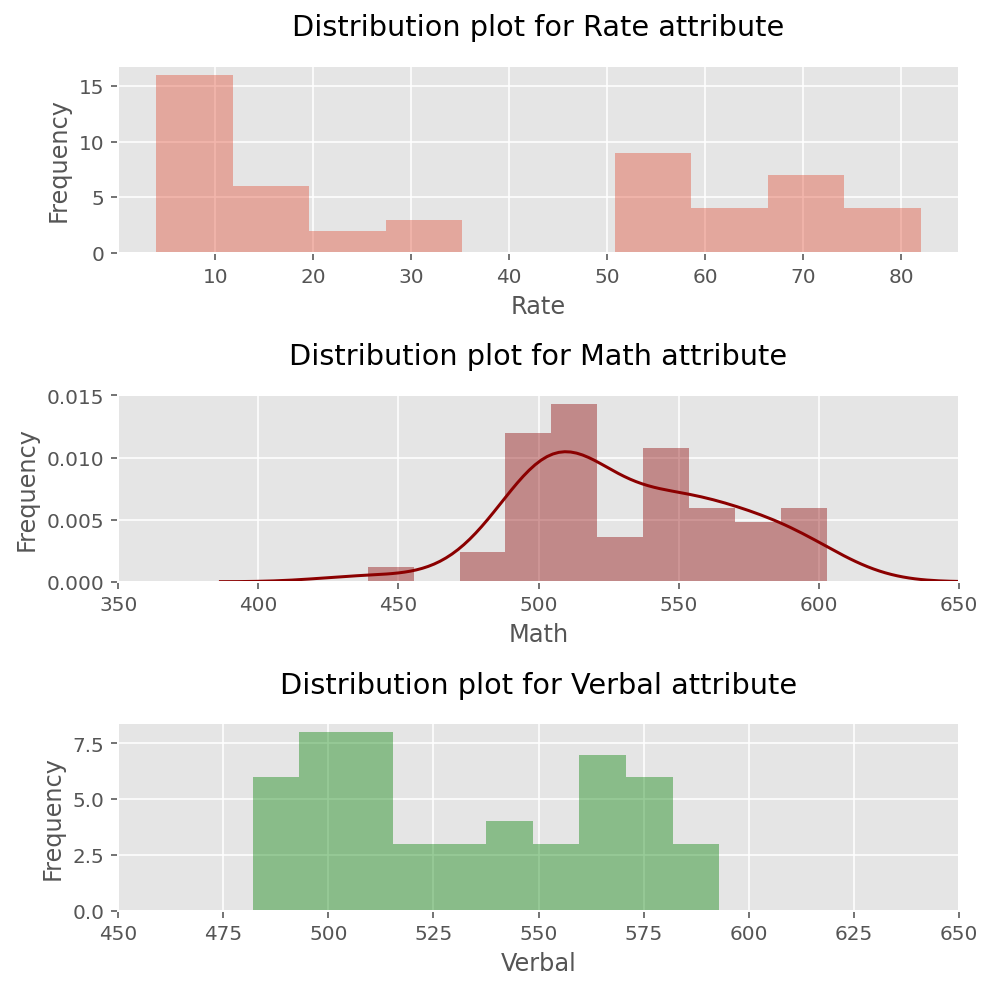

In [23]:
# create 3 rows of empty plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7,7))

sns.distplot(sat_df['Rate'], kde=False, ax=axes[0], bins=10)
axes[0].set_title('Distribution plot for Rate attribute', loc='center', pad=15)
axes[0].set_ylabel('Frequency')

sns.distplot(sat_df['Math'], kde=True, color= 'darkred', ax=axes[1], bins=10)
axes[1].set_title('Distribution plot for Math attribute', loc='center', pad=15)
axes[1].set_ylabel('Frequency')
axes[1].set_xlim([350,650])

sns.distplot(sat_df['Verbal'], kde=False, color='g', ax=axes[2], bins=10)
axes[2].set_title('Distribution plot for Verbal attribute', loc='center', pad=15)
axes[2].set_ylabel('Frequency')
axes[2].set_xlim([450,650])

plt.tight_layout()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

The pairplot illustrates the histograms on the diagonal figures, while the remaining are scatter plots that show the 
relationship between 2 variables as a 2-dimensional representation. We can also add a hue to add another level of
categorization within the scatter plots.

In [24]:
# basic plot
sns.pairplot(sat_df, corner=True, aspect=1.3, height=2)

In [25]:
# this will be used for the hue in the pairplot

#using a dictionary to sort the states into 4 categories:
def convert_to_region(state):
    region_dict = {'CT':'Northeast', 'NJ':'Northeast', 'MA':'Northeast', 'NY':'Northeast', 'NH':'Northeast', 
                   'RI':'Northeast', 'PA':'Northeast', 'VT':'Northeast', 'ME':'Northeast', 'VA':'South', 'DE':'South',
                   'MD':'South', 'NC':'South', 'GA':'South', 'IN':'Midwest', 'SC':'South', 'DC':'South', 'OR':'West', 
                   'FL':'South', 'WA':'West', 'TX':'South', 'HI':'West', 'AK':'West', 'CA':'West', 'AZ':'West', 
                   'NV':'West', 'CO':'West', 'OH':'Midwest', 'MT':'West', 'WV':'South', 'ID':'West', 'TN':'South', 
                   'NM':'West', 'IL':'Midwest', 'KY':'South', 'WY':'West', 'MI':'Midwest', 'MN':'Midwest', 'KS':'Midwest', 
                   'AL':'South', 'NE':'Midwest', 'OK':'South', 'MO':'Midwest', 'LA':'South', 'WI':'Midwest', 'AR':'South',
                   'UT':'West', 'IA':'Midwest', 'SD':'Midwest', 'ND':'Midwest', 'MS':'South'}
    
    return region_dict[state]

sat_df['State_to_Region'] = sat_df['State'].apply(convert_to_region)

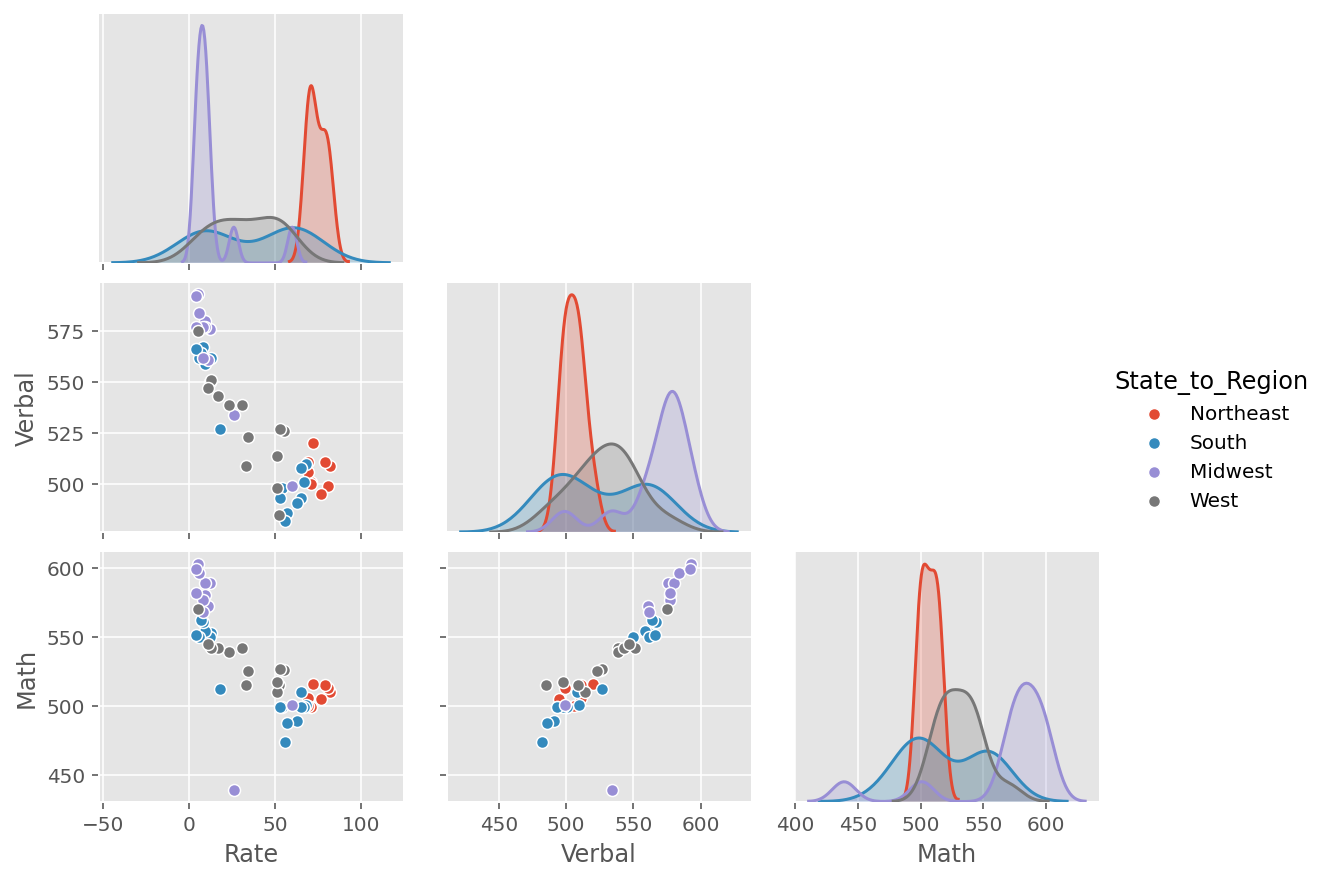

In [26]:
sns.pairplot(sat_df, corner=True, aspect=1.3, height=2, hue='State_to_Region')

In [27]:
# g = sns.PairGrid(sat_df, aspect=1.3, height=2)    #hue='State_to_Region'
# g.map_diag(plt.hist)
# g.map_lower(plt.scatter)                      #.add_legend()
# g.map_upper(sns.kdeplot)

In [28]:
g = sns.pairplot(sat_df, aspect=1.3, height=2, hue='State_to_Region')
g.map_lower(plt.scatter).add_legend()
g.map_upper(sns.kdeplot).add_legend()

In [29]:
# in case we need to remove this column from the dataframe

# sat_df.drop(columns='State_to_Region', inplace=True)

In [30]:
# other possible hues we could create to visualize

# check if math score is greater than or less than the average value
# sat_df['Hue1'] = sat_df['Math'] > sat_df['Math'].mean()

# check if both math and verbal score is greater than or less than the average value
# sat_df['Hue2'] = (sat_df['Math'] > sat_df['Math'].mean()) & (sat_df['Verbal'] > sat_df['Verbal'].mean())

# sat_df['State>benchmark'] = (sat_df['Math'] >= 530) & (sat_df['Verbal'] >= 480)

# cut the data into 4 quarters
# sat_df['Hue_test'] = pd.qcut(sat_df['Math'], q=4)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

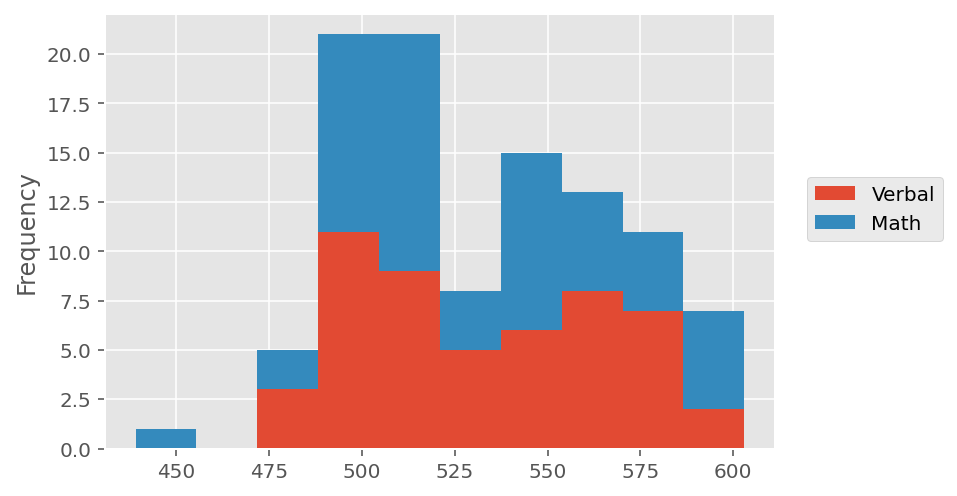

In [31]:
# sat_df[['Verbal','Math']].plot.hist(stacked=True)

sat_df.plot(y=['Verbal','Math'], kind='hist', stacked=True)
plt.legend(loc='center', bbox_to_anchor=(1.15,.55))

<AxesSubplot:xlabel='State'>

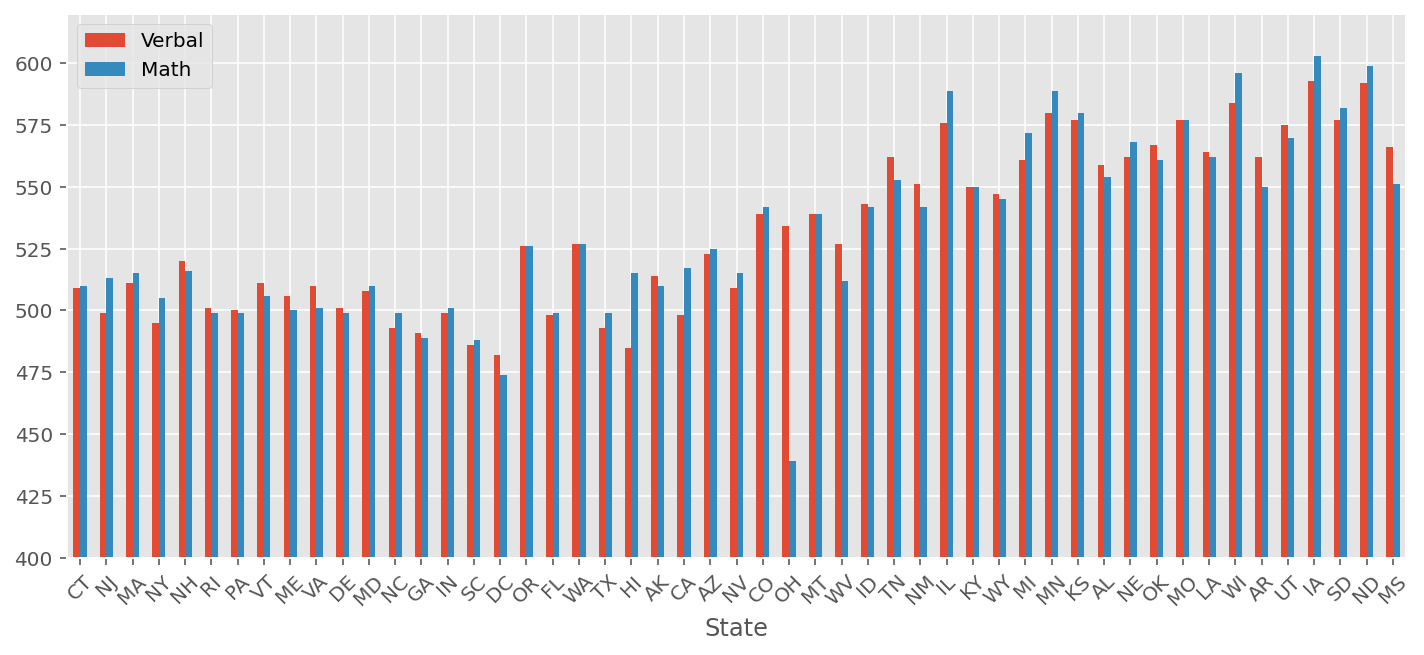

In [32]:
test1 = sat_df.set_index('State')
test1.plot(y=['Verbal','Math'], kind='bar', stacked=False, ylim=[400, 620], rot=45, figsize=(12,5))

<AxesSubplot:xlabel='State'>

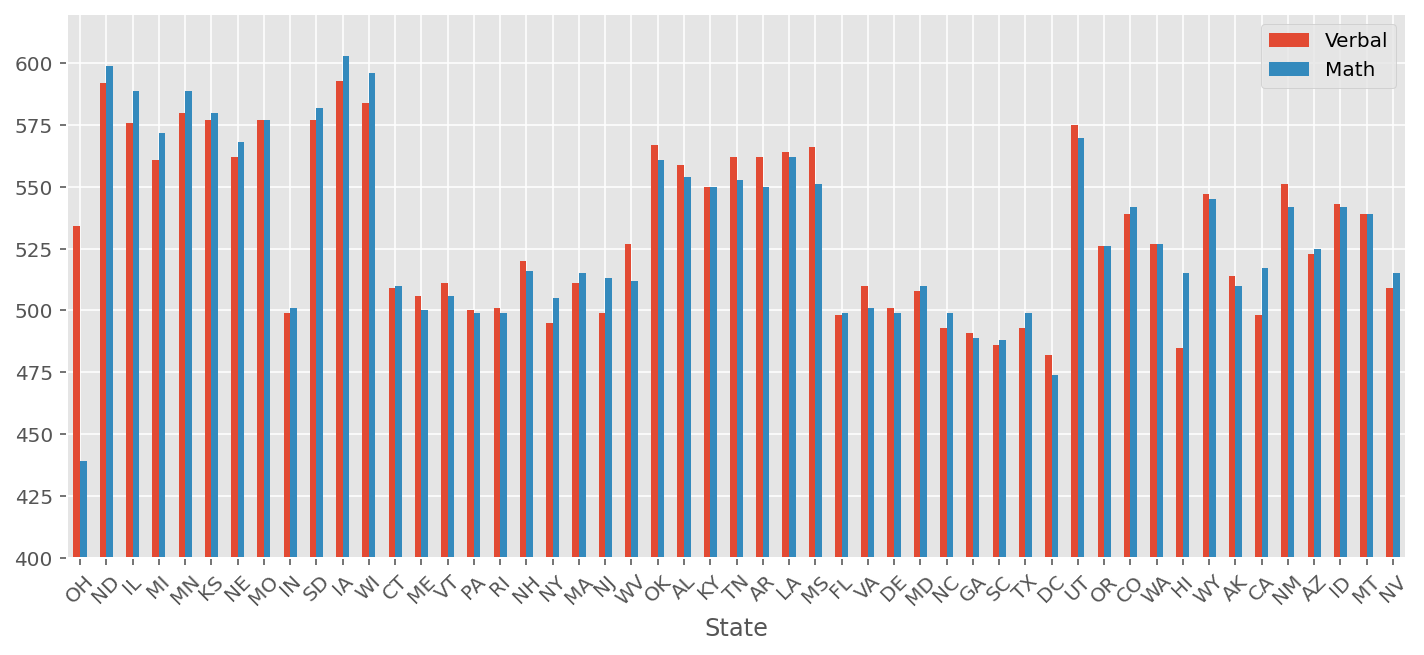

In [33]:
# group the above chart by region...
test2 = test1.sort_values(by=['State_to_Region'])
test2.plot(y=['Verbal','Math'], kind='bar', ylim=[400, 620], rot=45, figsize=(12,5))

C:\Users\Michael\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Michael\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Michael\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Michael\anaconda3\lib\site-packages\pandas\plottin

<AxesSubplot:xlabel='Verbal', ylabel='Math'>

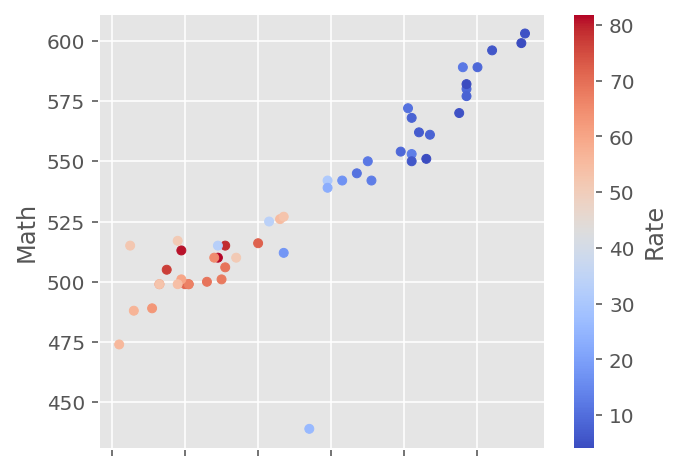

In [34]:
sat_df.plot(x='Verbal', y='Math', kind='scatter', c='Rate', cmap='coolwarm', figsize=(5,4))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

**A boxplot is as a graphical method of displaying variation in a set of data. In most cases, a histogram provides a sufficient display, but a boxplot can provide additional detail while allowing multiple sets of data to be displayed in the same graph. Scatter plots will only show variation between 2 variables. Histograms can be misleading, depending on the number of bins selected.**

**<u>Advantages of Boxplots</u>              
Graphically display a variable's location and spread. Provides some indication of the data's symmetry and skewness. 
Unlike many other methods of data visualisation, boxplots show outliers.**
    
**Since Math and Verbal have a different range of values with Rate, we cannot compare the box plots. However, we can overcome this by standardizing the 3 variables.**

**<u>Guidelines for comparing boxplots</u>**
- **Compare the respective medians, to compare location.**
- **Compare the interquartile ranges (that is, the box lengths), to compare dispersion.**
- **Look at the overall spread.** 
- **Look for signs of skewness.** 
- **Look for potential outliers.**

<AxesSubplot:title={'center':'Boxplot for Verbal and Math'}>

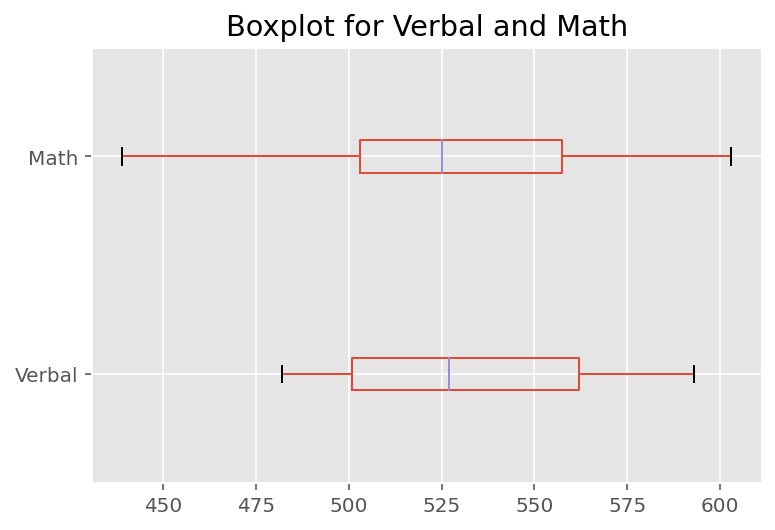

In [35]:
sat_df.plot(y=['Verbal','Math'], kind='box', title='Boxplot for Verbal and Math', vert=False)

<AxesSubplot:title={'center':'Boxplot for Verbal, Math and Rate'}>

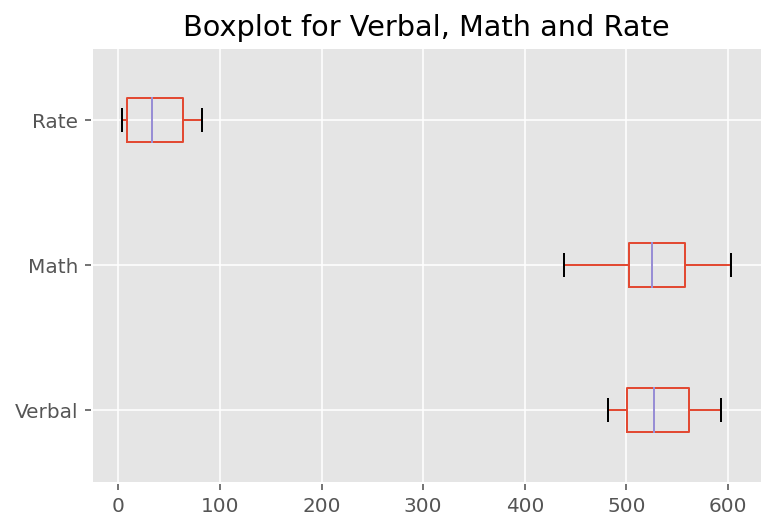

In [36]:
sat_df.plot(y=['Verbal','Math', 'Rate'], kind='box', title='Boxplot for Verbal, Math and Rate', vert=False)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<AxesSubplot:title={'center':'Boxplot for Verbal, Math and Rate'}>

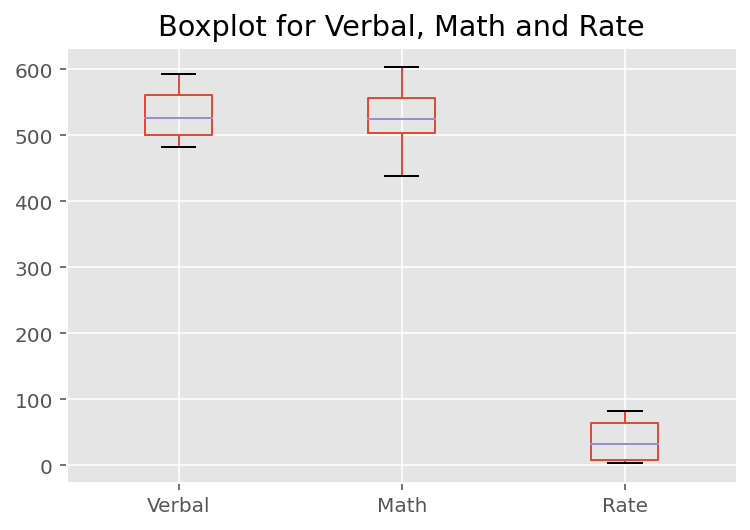

In [37]:
sat_df.plot(y=['Verbal','Math','Rate'], kind='box', title='Boxplot for Verbal, Math and Rate')

In [38]:
from scipy.stats import zscore

# standardizing the values so that we can compare them
test = sat_df[['Rate','Verbal','Math']].apply(zscore)
test.rename(columns={'Rate':'z_Rate', 'Verbal':'z_Verbal', 'Math':'z_Math'}, inplace=True)
test.head()

z_Rate  z_Verbal    z_Math
0  1.649606 -0.712322 -0.607938
1  1.612948 -1.015059 -0.524442
2  1.539632 -0.651775 -0.468778
3  1.466317 -1.136154 -0.747098
4  1.283027 -0.379312 -0.440946

In [39]:
new_sat_df = pd.concat([sat_df, test], axis=1)
new_sat_df.head()

State  Rate  Verbal  Math State_to_Region    z_Rate  z_Verbal    z_Math
0    CT    82     509   510       Northeast  1.649606 -0.712322 -0.607938
1    NJ    81     499   513       Northeast  1.612948 -1.015059 -0.524442
2    MA    79     511   515       Northeast  1.539632 -0.651775 -0.468778
3    NY    77     495   505       Northeast  1.466317 -1.136154 -0.747098
4    NH    72     520   516       Northeast  1.283027 -0.379312 -0.440946

<AxesSubplot:title={'center':'Boxplot for Verbal, Math and Rate'}>

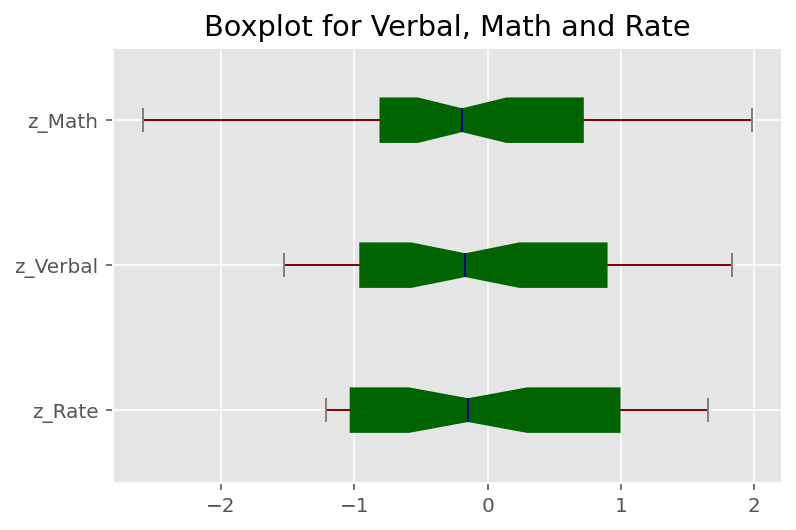

In [40]:
# props = dict(boxes="DarkBlue", whiskers="r", medians="red", caps="Gray")
props = dict(boxes="DarkGreen", whiskers="DarkRed", medians="DarkBlue", caps="Gray")

new_sat_df.plot(y=['z_Rate','z_Verbal','z_Math'], kind='box', title='Boxplot for Verbal, Math and Rate', 
                color=props, patch_artist=True, notch=True, vert=False)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [41]:
sat_df['Verbal'].mean()

532.5294117647059

In [42]:
mask1 = sat_df['Verbal'] >= sat_df['Verbal'].mean()
sat_df[mask1]

# sat_df.loc[mask1]

State  Rate  Verbal  Math State_to_Region
26    CO    31     539   542            West
27    OH    26     534   439         Midwest
28    MT    23     539   539            West
30    ID    17     543   542            West
31    TN    13     562   553           South
32    NM    13     551   542            West
33    IL    12     576   589         Midwest
34    KY    12     550   550           South
35    WY    11     547   545            West
36    MI    11     561   572         Midwest
37    MN     9     580   589         Midwest
38    KS     9     577   580         Midwest
39    AL     9     559   554           South
40    NE     8     562   568         Midwest
41    OK     8     567   561           South
42    MO     8     577   577         Midwest
43    LA     7     564   562           South
44    WI     6     584   596         Midwest
45    AR     6     562   550           South
46    UT     5     575   570            West
47    IA     5     593   603         Midwest
48    SD     4     577   582         Midwest
49    ND     4     592   599         Midwest
50    MS     4     566   551           South

In [43]:
sat_df[mask1].shape

(24, 5)

In [44]:
print(list(sat_df[mask1].State))

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


In [45]:
# number of states that have a verbal score greater than the average
len(sat_df[mask1]['State'])

24

**Since 24 out of the 51 states are above the `Verbal` average, this implies that the distribution for the `Verbal` column is slightly skewed to the left.**

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [46]:
mask2 = sat_df['Verbal'] >= sat_df['Verbal'].median()
sat_df[mask2]

State  Rate  Verbal  Math State_to_Region
19    WA    53     527   527            West
26    CO    31     539   542            West
27    OH    26     534   439         Midwest
28    MT    23     539   539            West
29    WV    18     527   512           South
30    ID    17     543   542            West
31    TN    13     562   553           South
32    NM    13     551   542            West
33    IL    12     576   589         Midwest
34    KY    12     550   550           South
35    WY    11     547   545            West
36    MI    11     561   572         Midwest
37    MN     9     580   589         Midwest
38    KS     9     577   580         Midwest
39    AL     9     559   554           South
40    NE     8     562   568         Midwest
41    OK     8     567   561           South
42    MO     8     577   577         Midwest
43    LA     7     564   562           South
44    WI     6     584   596         Midwest
45    AR     6     562   550           South
46    UT     5     575   570            West
47    IA     5     593   603         Midwest
48    SD     4     577   582         Midwest
49    ND     4     592   599         Midwest
50    MS     4     566   551           South

In [47]:
sat_df[mask2].count()

State              26
Rate               26
Verbal             26
Math               26
State_to_Region    26
dtype: int64

In [48]:
# number of states that have a verbal score greater than the median
len(sat_df[mask2]['State'])

26

**There are more states above the median Verbal score than there are states above the Verbal score mean.**

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [49]:
sat_df['Verbal - Math'] = sat_df['Verbal'] - sat_df['Math']
sat_df.head()

State  Rate  Verbal  Math State_to_Region  Verbal - Math
0    CT    82     509   510       Northeast             -1
1    NJ    81     499   513       Northeast            -14
2    MA    79     511   515       Northeast             -4
3    NY    77     495   505       Northeast            -10
4    NH    72     520   516       Northeast              4

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [50]:
mask = sat_df['Verbal'] > sat_df['Math']
sat_df[mask].sort_values(by='Verbal - Math', ascending=False).head(3)

State  Rate  Verbal  Math State_to_Region  Verbal - Math
27    OH    26     534   439         Midwest             95
29    WV    18     527   512           South             15
50    MS     4     566   551           South             15

In [51]:
sat_df.sort_values(by='Verbal - Math', ascending=True).head(3)

State  Rate  Verbal  Math State_to_Region  Verbal - Math
21    HI    52     485   515            West            -30
23    CA    51     498   517            West            -19
1     NJ    81     499   513       Northeast            -14

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


A correlation matrix is a table showing the correlation coefficients between sets of variables in a dataset.

In [52]:
sat_df.corr()

Rate    Verbal      Math  Verbal - Math
Rate           1.000000 -0.888121 -0.773419      -0.098671
Verbal        -0.888121  1.000000  0.899909       0.044527
Math          -0.773419  0.899909  1.000000      -0.395574
Verbal - Math -0.098671  0.044527 -0.395574       1.000000

<AxesSubplot:>

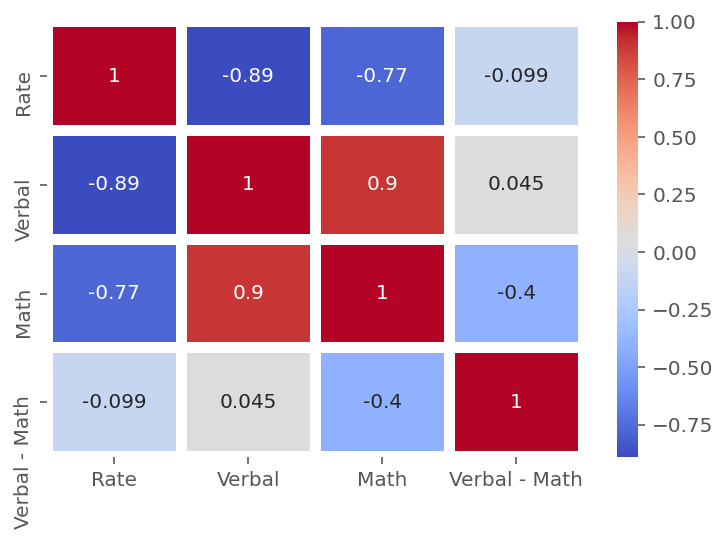

In [53]:
sns.heatmap(data=sat_df.corr(), annot=True, cmap='coolwarm', linecolor='white', linewidths=5)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

.describe() gives us the following statistics:

Count, which is equivalent to the number of cells (rows).
Mean, or, the average of the values in the column.
Std, which is the standard deviation.
Min, the minimum value.
25%, or, the 25th percentile of the values.
50%, or, the 50th percentile of the values ( which is the equivalent to the median).
75%, or, the 75th percentile of the values.
Max, the maximum value.

In [54]:
sat_df.describe()

Rate      Verbal        Math  Verbal - Math
count  51.000000   51.000000   51.000000      51.000000
mean   37.000000  532.529412  531.843137       0.686275
std    27.550681   33.360667   36.287393      15.839811
min     4.000000  482.000000  439.000000     -30.000000
25%     9.000000  501.000000  503.000000      -6.000000
50%    33.000000  527.000000  525.000000       0.000000
75%    64.000000  562.000000  557.500000       4.500000
max    82.000000  593.000000  603.000000      95.000000

In [55]:
sat_df.describe(include=['object'])

State State_to_Region
count     51              51
unique    51               4
top       RI           South
freq       1              17

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

- **Covariance is when two variables vary with each other, whereas Correlation is when the change in one variable results in the change in another variable.**
- both the terms measure the relationship and the dependency between two variables. “Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables.
- When it comes to choosing between Covariance vs Correlation, the latter stands to be the first choice as it remains unaffected by the change in dimensions, location, and scale, and can also be used to make a comparison between two pairs of variables. Since it is limited to a range of -1 to +1, it is useful to draw comparisons between variables across domains. However, an important limitation is that both these concepts measure the only linear relationship.

<figure class="wp-block-table"><table><tbody><tr><td><strong>Covariance</strong></td><td><strong>Correlation</strong></td></tr><tr><td>Covariance is a measure to indicate the extent to which two random variables change in tandem.</td><td>Correlation is a measure used to represent how strongly two random variables are related to each other.</td></tr><tr><td>Covariance is nothing but a measure of correlation.</td><td>Correlation refers to the scaled form of covariance.</td></tr><tr><td>Covariance indicates the direction of the linear relationship between variables.</td><td> Correlation on the other hand measures both the strength and direction of the linear relationship between two variables.</td></tr><tr><td>Covariance can vary between -∞ and +∞</td><td>Correlation ranges between -1 and +1</td></tr><tr><td>Covariance is affected by the change in scale. If all the values of one variable are multiplied by a constant and all the values of another variable are multiplied, by a similar or different constant, then the covariance is changed.&nbsp;</td><td>Correlation is not influenced by the change in scale.</td></tr><tr><td>Covariance assumes the units from the product of the units of the two variables.</td><td>Correlation is dimensionless, i.e. It’s a unit-free measure of the relationship between variables.</td></tr><tr><td>Covariance&nbsp;of two&nbsp;dependent variables&nbsp;measures how much in real quantity&nbsp;(i.e. cm, kg, liters)&nbsp;on average&nbsp;they&nbsp;co-vary.</td><td>Correlation&nbsp;of two&nbsp;dependent&nbsp;variables&nbsp;measures the&nbsp;proportion&nbsp;of how much&nbsp;on average these variables&nbsp;vary&nbsp;w.r.t one another.</td></tr><tr><td>Covariance is zero in case of independent variables (if one variable moves and the other doesn’t) because then the variables do not necessarily move together.</td><td>Independent movements do not contribute to the total correlation. Therefore, completely independent variables have a zero correlation.</td></tr></tbody></table></figure>

You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.

In [56]:
cov_matrix = sat_df[['Rate','Verbal', 'Math']].cov()
cov_matrix

Rate       Verbal         Math
Rate    759.04  -816.280000  -773.220000
Verbal -816.28  1112.934118  1089.404706
Math   -773.22  1089.404706  1316.774902

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [57]:
path = '.\drug-use-by-age.csv'
drug_df = pd.read_csv(path)
drug_df.head()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency  ...  oxycontin-use oxycontin-frequency  tranquilizer-use  \
0               -  ...            0.1                24.5               0.2   
1             3.0  ...            0.1                41.0               0.3   
2               -  ...            0.4                 4.5               0.9   
3             9.5  ...            0.8                 3.0               2.0   
4             1.0  ...            1.1                 4.0               2.4   

   tranquilizer-frequency  stimulant-use stimulant-frequency  meth-use  \
0                    52.0            0.2                 2.0       0.0   
1                    25.5            0.3                 4.0       0.1   
2                     5.0            0.8                12.0       0.1   
3                     4.5            1.5                 6.0       0.3   
4                    11.0            1.8                 9.5       0.3   

   meth-frequency  sedative-use sedative-frequency  
0               -           0.2               13.0  
1             5.0           0.1               19.0  
2            24.0           0.2               16.5  
3            10.5           0.4               30.0  
4            36.0           0.2                3.0  

[5 rows x 28 columns]

In [58]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [59]:
drug_df.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

Does this data require cleaning? Yes, and then some. 
- The data type are incorrect for 6 of the variables (the ones with 'frequency' in the name)
- Based on the .info() method and the null count, there appears to be no missing data, however, this is clearly not the case. The reason being that the data is currently an object type and '-' is not considered missing data at the moment.
- This will affect the EDA by giving misleading results and produces misleading visualisations.
- All variables appear to have a use & frequency column, however, there may very well be more variables...

In [60]:
sns.heatmap(drug_df.isnull(), cbar=False)

<AxesSubplot:>

In [61]:
sns.clustermap(drug_df.corr())

In [62]:
# import missingno as msno
# msno.matrix(drug_df)
# msno.bar(drug_df)
# msno.heatmap(drug_df)

**The median is the middle number in a sorted, ascending or descending, list of numbers and can be more descriptive of that data set than the average. The median is sometimes used as opposed to the mean when there are outliers in the sequence that might skew the average of the values.**

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [63]:
drug_df.head()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency  ...  oxycontin-use oxycontin-frequency  tranquilizer-use  \
0               -  ...            0.1                24.5               0.2   
1             3.0  ...            0.1                41.0               0.3   
2               -  ...            0.4                 4.5               0.9   
3             9.5  ...            0.8                 3.0               2.0   
4             1.0  ...            1.1                 4.0               2.4   

   tranquilizer-frequency  stimulant-use stimulant-frequency  meth-use  \
0                    52.0            0.2                 2.0       0.0   
1                    25.5            0.3                 4.0       0.1   
2                     5.0            0.8                12.0       0.1   
3                     4.5            1.5                 6.0       0.3   
4                    11.0            1.8                 9.5       0.3   

   meth-frequency  sedative-use sedative-frequency  
0               -           0.2               13.0  
1             5.0           0.1               19.0  
2            24.0           0.2               16.5  
3            10.5           0.4               30.0  
4            36.0           0.2                3.0  

[5 rows x 28 columns]

In [64]:
drug_df.replace(to_replace='-', value=np.nan, inplace=True)

In [65]:
# converts the required columns data types to float64, if it can't then it converts to np.nan
# 'raise' - then invalid parsing will raise an exception.
# 'coerce' - then invalid parsing will be set as NaN.
# 'ignore' - then invalid parsing will return the input.

drug_df.iloc[:,7:] = drug_df.iloc[:,7:].apply(lambda x: pd.to_numeric(x, errors='coerce'))
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        16 non-null     float64
 8   crack-use                17 non-null     float64
 9   crack-frequency          14 non-null     float64
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         16 non-null     float64
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [66]:
# We can now see that we are actually missing some data
# drug_df.isnull().sum()
drug_df.isnull().sum().sum()

9

In [67]:
null_df = pd.DataFrame(drug_df.isnull().sum(), columns=['Count of Nulls'])
# null_df.index.name = 'Column'
null_df[null_df['Count of Nulls'] > 0].sort_values(by=['Count of Nulls'], ascending=False)

Count of Nulls
crack-frequency                   3
meth-frequency                    2
cocaine-frequency                 1
heroin-frequency                  1
inhalant-frequency                1
oxycontin-frequency               1

In [68]:
# view the rows that have missing data
drug_df[drug_df.isnull().any(axis = 1)].iloc[:,7::2]

cocaine-frequency  crack-frequency  heroin-frequency  \
0                 5.0              NaN              35.5   
1                 1.0              3.0               NaN   
2                 5.5              NaN               2.0   
16                NaN              NaN             120.0   

    hallucinogen-frequency  inhalant-frequency  pain-releiver-frequency  \
0                     52.0                19.0                     36.0   
1                      6.0                12.0                     14.0   
2                      3.0                 5.0                     12.0   
16                     2.0                 NaN                     24.0   

    oxycontin-frequency  tranquilizer-frequency  stimulant-frequency  \
0                  24.5                    52.0                  2.0   
1                  41.0                    25.5                  4.0   
2                   4.5                     5.0                 12.0   
16                  NaN                     5.0                364.0   

    meth-frequency  sedative-frequency  
0              NaN                13.0  
1              5.0                19.0  
2             24.0                16.5  
16             NaN                15.0

In [69]:
# in this particular case we are filling all the missing values with a zero.
drug_df = drug_df.fillna(value=0)
drug_df

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49  7391         75.0               52.0           10.4   
15  50-64  3923         67.2               52.0            7.3   
16    65+  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0                   4.0          0.1                5.0        0.0   
1                  15.0          0.1                1.0        0.0   
2                  24.0          0.1                5.5        0.0   
3                  25.0          0.5                4.0        0.1   
4                  30.0          1.0                7.0        0.0   
5                  36.0          2.0                5.0        0.1   
6                  52.0          3.2                5.0        0.4   
7                  60.0          4.1                5.5        0.5   
8                  60.0          4.9                8.0        0.6   
9                  52.0          4.8                5.0        0.5   
10                 52.0          4.5                5.0        0.5   
11                 60.0          4.0                6.0        0.5   
12                 52.0          3.2                5.0        0.4   
13                 72.0          2.1                8.0        0.5   
14                 48.0          1.5               15.0        0.5   
15                 52.0          0.9               36.0        0.4   
16                 36.0          0.0                0.0        0.0   

    crack-frequency  ...  oxycontin-use  oxycontin-frequency  \
0               0.0  ...            0.1                 24.5   
1               3.0  ...            0.1                 41.0   
2               0.0  ...            0.4                  4.5   
3               9.5  ...            0.8                  3.0   
4               1.0  ...            1.1                  4.0   
5              21.0  ...            1.4                  6.0   
6              10.0  ...            1.7                  7.0   
7               2.0  ...            1.5                  7.5   
8               5.0  ...            1.7                 12.0   
9              17.0  ...            1.3                 13.5   
10              5.0  ...            1.7                 17.5   
11              6.0  ...            1.3                 20.0   
12              6.0  ...            1.2                 13.5   
13             15.0  ...            0.9                 46.0   
14             48.0  ...            0.3                 12.0   
15             62.0  ...            0.4                  5.0   
16              0.0  ...            0.0                  0.0   

    tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0                0.2                    52.0            0.2   
1                0.3                    25.5            0.3   
2                0.9                     5.0            0.8   
3                2.0                     4.5            1.5   
4                2.4                    11.0            1.8   
5                3.5     

<AxesSubplot:>

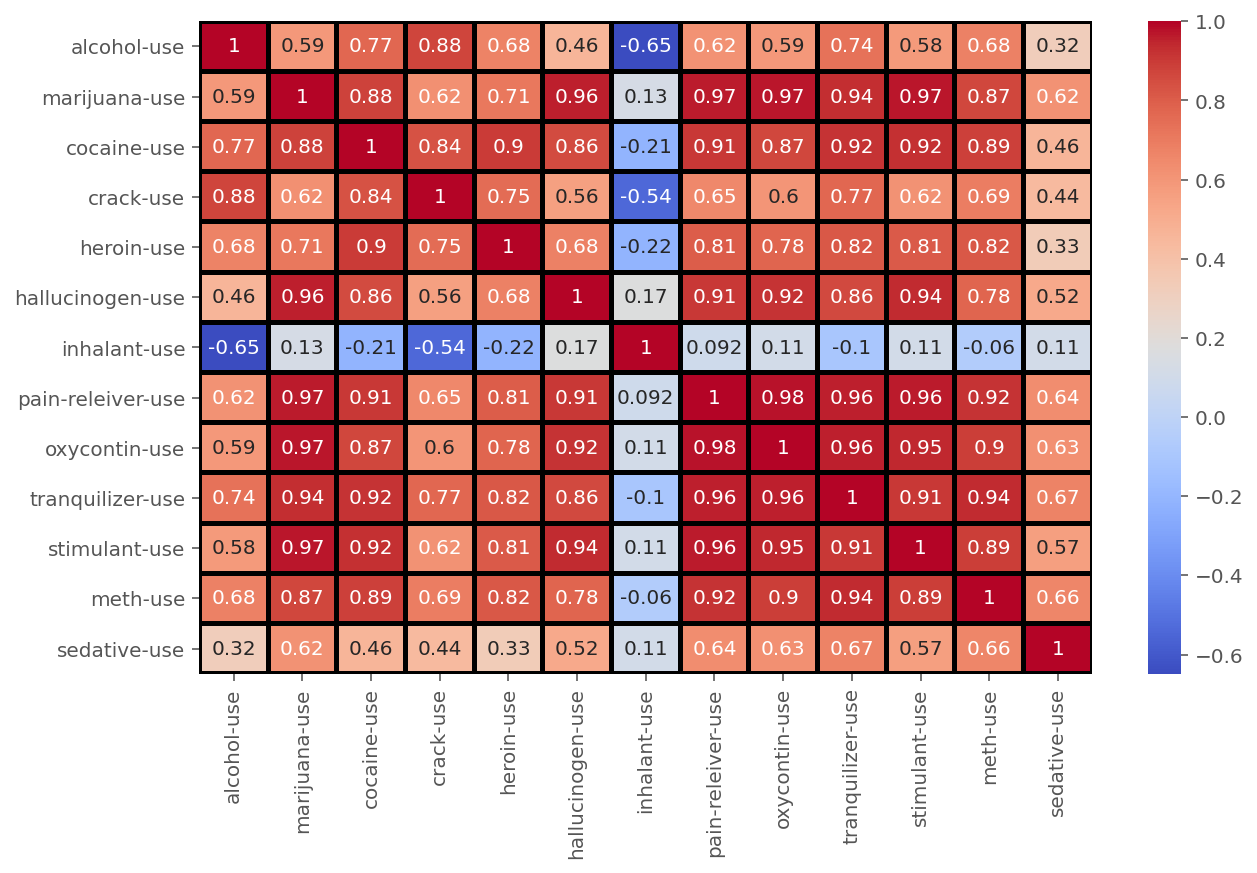

In [70]:
# correlation for the 'use' columns only
plt.figure(figsize=(10,6))
sns.heatmap(drug_df.filter(regex='use').corr(), cmap='coolwarm', annot=True,lw=2, linecolor='black')

- **marijuana appears to be correlated across the board (i.e gateway drug), with the exception of inhalant-use**
- **'use' columns are highly correlated**
- **rate of alcohol use has the highest correlation with cocaine and crack use**

C:\Users\Michael\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


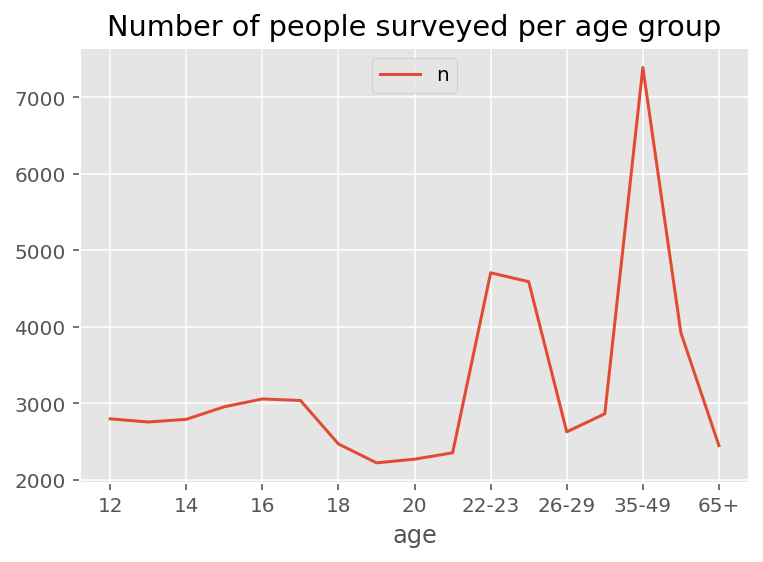

In [71]:
drug_df.set_index('age').plot(y='n', kind='line')
plt.title('Number of people surveyed per age group')
plt.legend(loc=9)
plt.show()

In [72]:
# the 2 main standouts
group1 = ['alcohol-use','marijuana-use']
drug_df.set_index('age').filter(regex='use')[group1].T.plot(kind='bar', figsize=(12,5),rot=0, cmap='viridis')

<AxesSubplot:>

In [73]:
drug_df['marijuana-frequency'].plot()

<AxesSubplot:>

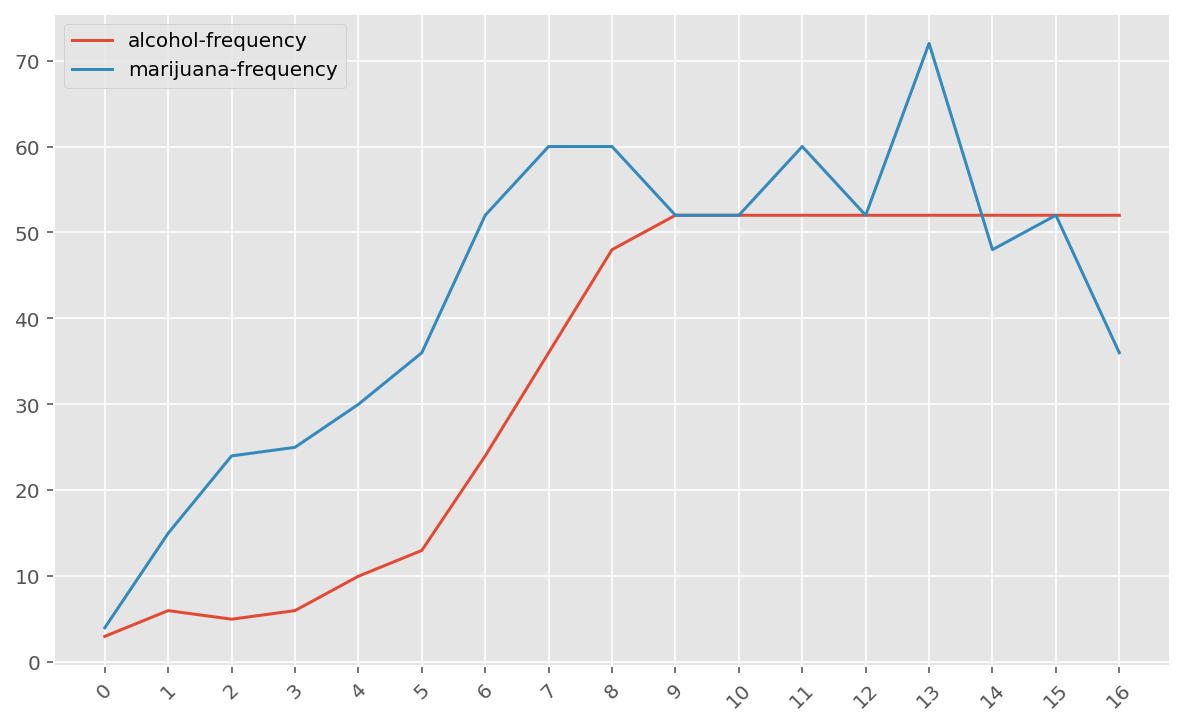

In [74]:
g=drug_df[['alcohol-frequency','marijuana-frequency']].plot(figsize=(10,6), rot=45)
# plt.title('Percentage rate of alcohol and marijuana users')
g.set_xticks(np.arange(len(drug_df.index)))
g.set_xticklabels(drug_df.index)
plt.show()

In [75]:
# indicates that the number of people surveyed for each age group is skewed towards the age groups for adults. 
# Might be worhtwhile to obtain more samples for the lower age groups...

In [76]:
drug_df_class = drug_df.copy()

In [77]:
def convert_age_class(age):
    age_class_dict = {'12':'12-17', '13':'12-17', '14':'12-17', '15':'12-17', '16':'12-17', 
                   '17':'12-17', '18':'18-25', '19':'18-25', '20':'18-25', '21':'18-25', '22-23':'18-25',
                   '24-25':'18-25', '26-29':'26-34', '30-34':'26-34', '35-49':'35-49', '50-64':'50-64', '65+':'65+', 
                   }
    
    return age_class_dict[age]

drug_df_class['age_class'] = drug_df['age'].apply(convert_age_class)

In [78]:
# putting the age_class column at the beginning
age_class = drug_df_class['age_class']
drug_df_class.drop(labels=['age','age_class'], axis=1,inplace = True)
drug_df_class.insert(0, 'age_class', age_class)
drug_df_class

age_class     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12-17  2798          3.9                3.0            1.1   
1      12-17  2757          8.5                6.0            3.4   
2      12-17  2792         18.1                5.0            8.7   
3      12-17  2956         29.2                6.0           14.5   
4      12-17  3058         40.1               10.0           22.5   
5      12-17  3038         49.3               13.0           28.0   
6      18-25  2469         58.7               24.0           33.7   
7      18-25  2223         64.6               36.0           33.4   
8      18-25  2271         69.7               48.0           34.0   
9      18-25  2354         83.2               52.0           33.0   
10     18-25  4707         84.2               52.0           28.4   
11     18-25  4591         83.1               52.0           24.9   
12     26-34  2628         80.7               52.0           20.8   
13     26-34  2864         77.5               52.0           16.4   
14     35-49  7391         75.0               52.0           10.4   
15     50-64  3923         67.2               52.0            7.3   
16       65+  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0                   4.0          0.1                5.0        0.0   
1                  15.0          0.1                1.0        0.0   
2                  24.0          0.1                5.5        0.0   
3                  25.0          0.5                4.0        0.1   
4                  30.0          1.0                7.0        0.0   
5                  36.0          2.0                5.0        0.1   
6                  52.0          3.2                5.0        0.4   
7                  60.0          4.1                5.5        0.5   
8                  60.0          4.9                8.0        0.6   
9                  52.0          4.8                5.0        0.5   
10                 52.0          4.5                5.0        0.5   
11                 60.0          4.0                6.0        0.5   
12                 52.0          3.2                5.0        0.4   
13                 72.0          2.1                8.0        0.5   
14                 48.0          1.5               15.0        0.5   
15                 52.0          0.9               36.0        0.4   
16                 36.0          0.0                0.0        0.0   

    crack-frequency  ...  oxycontin-use  oxycontin-frequency  \
0               0.0  ...            0.1                 24.5   
1               3.0  ...            0.1                 41.0   
2               0.0  ...            0.4                  4.5   
3               9.5  ...            0.8                  3.0   
4               1.0  ...            1.1                  4.0   
5              21.0  ...            1.4                  6.0   
6              10.0  ...            1.7                  7.0   
7               2.0  ...            1.5                  7.5   
8               5.0  ...            1.7                 12.0   
9              17.0  ...            1.3                 13.5   
10              5.0  ...            1.7                 17.5   
11              6.0  ...            1.3                 20.0   
12              6.0  ...            1.2                 13.5   
13             15.0  ...            0.9                 46.0   
14             48.0  ...            0.3                 12.0   
15             62.0  ...            0.4                  5.0   
16              0.0  ...            0.0                  0.0   

    tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0                0.2                    52.0            0.2   
1                0.3                    25.5            0.3   
2                0.9                     5.0            0.8   
3                2.0                     4.5            1.5   
4                2.4           

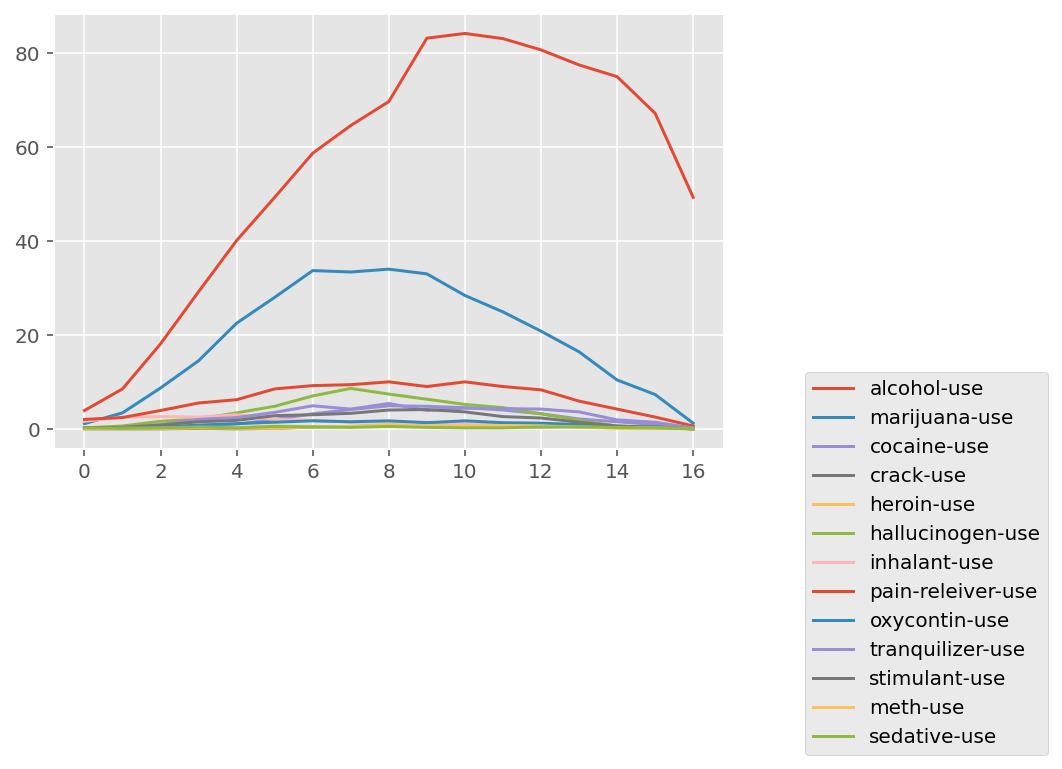

In [79]:
drug_df.drop(columns=['n']).filter(regex='use').plot()
plt.legend(bbox_to_anchor=(1.5,.2))

In [80]:
drug_df_groupby = drug_df_class.groupby('age_class').mean().filter(regex='use')

group1 = ['alcohol-use','marijuana-use']
drug_df_groupby[group1].T.plot(kind='bar', figsize=(12,5),rot=0, cmap='viridis')

<AxesSubplot:>

<AxesSubplot:>

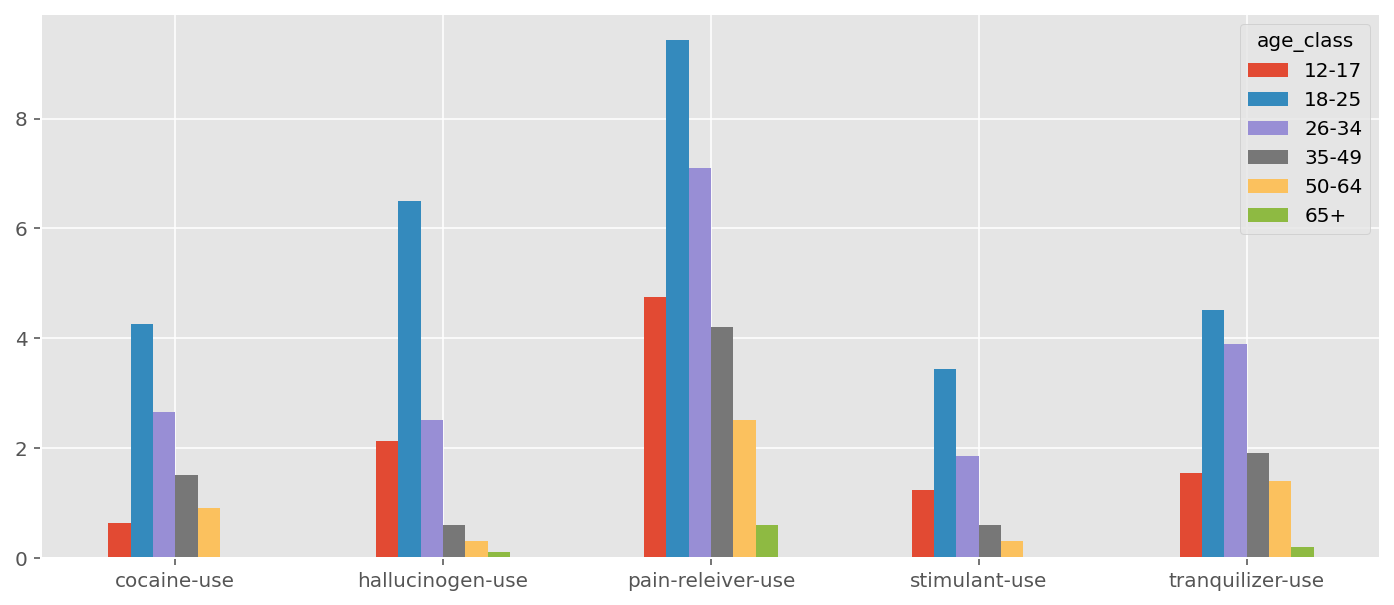

In [81]:
group2 = ['cocaine-use','hallucinogen-use','pain-releiver-use', 'stimulant-use', 'tranquilizer-use']
drug_df_groupby[group2].T.plot(kind='bar', figsize=(12,5),rot=0)

<AxesSubplot:>

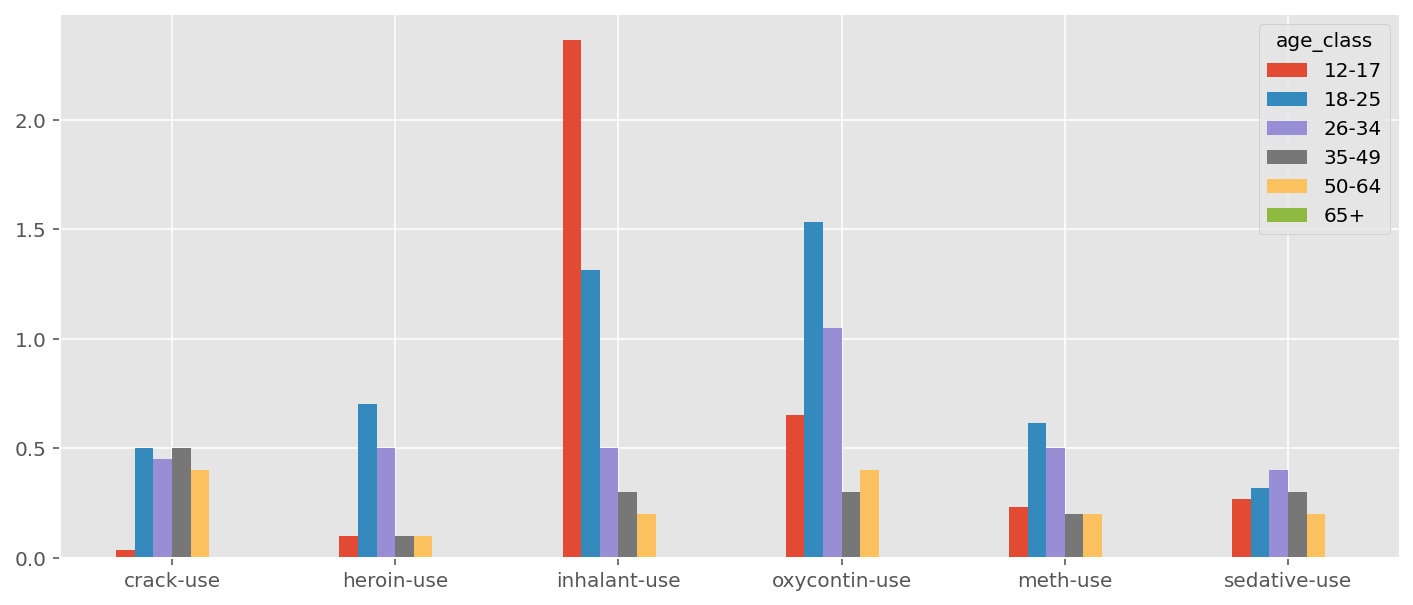

In [82]:
group3 = ['crack-use','heroin-use','inhalant-use', 'oxycontin-use', 'meth-use','sedative-use']
drug_df_groupby[group3].T.plot(kind='bar', figsize=(12,5), rot=0)

In [83]:
drug_df.set_index('age', inplace=True)

In [84]:
g=drug_df.filter(regex='use')[group1].plot(figsize=(10,6), rot=45)
plt.title('Percentage rate of alcohol and marijuana users')
g.set_xticks(np.arange(len(drug_df.index)))
g.set_xticklabels(drug_df.index)
plt.show()

C:\Users\Michael\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


C:\Users\Michael\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


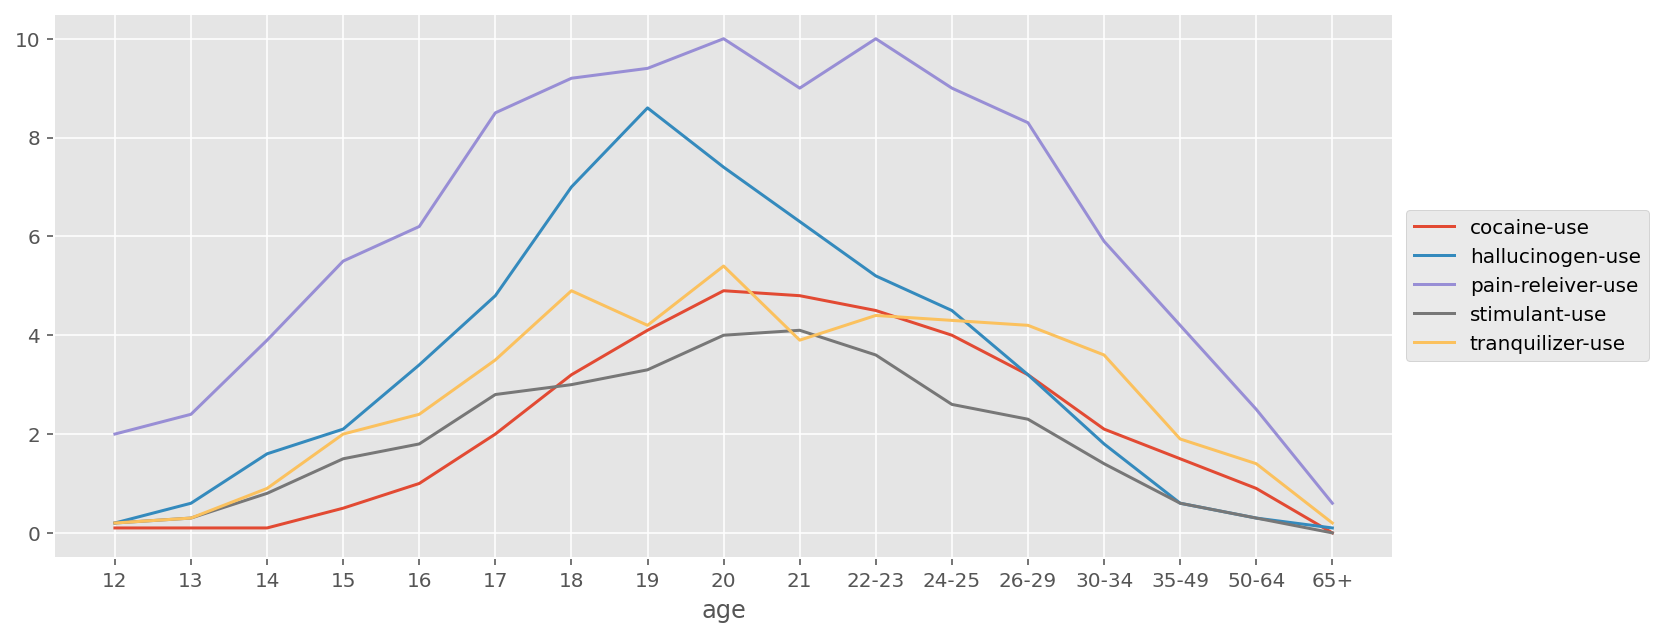

In [85]:
g = drug_df.filter(regex='use')[group2].plot(figsize=(12,5))
g.set_xticks(np.arange(len(drug_df.index)))
g.set_xticklabels(drug_df.index)
plt.legend(loc='center', bbox_to_anchor=(1.1,.5))

C:\Users\Michael\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


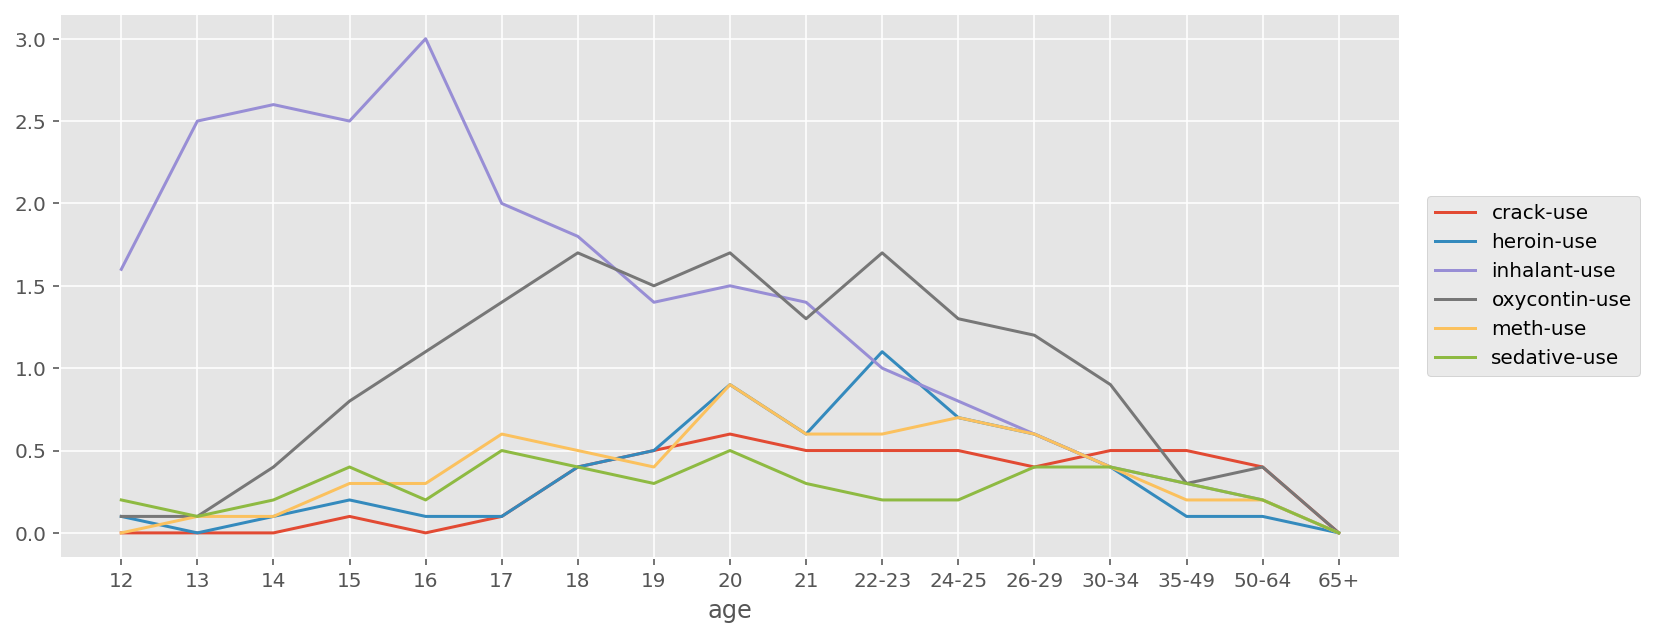

In [86]:
g = drug_df.filter(regex='use')[group3].plot(figsize=(12,5))
g.set_xticks(np.arange(len(drug_df.index)))
g.set_xticklabels(drug_df.index)
plt.legend(loc='center', bbox_to_anchor=(1.1,.5))

In [87]:
# converting percentages back to the actual numbers
df = drug_df_class[['age_class','n']].join(drug_df_class.filter(regex='use').apply(lambda x: x * (drug_df_class['n']/100)))
df.head()

age_class     n  alcohol-use  marijuana-use  cocaine-use  crack-use  \
0     12-17  2798      109.122         30.778        2.798      0.000   
1     12-17  2757      234.345         93.738        2.757      0.000   
2     12-17  2792      505.352        242.904        2.792      0.000   
3     12-17  2956      863.152        428.620       14.780      2.956   
4     12-17  3058     1226.258        688.050       30.580      0.000   

   heroin-use  hallucinogen-use  inhalant-use  pain-releiver-use  \
0       2.798             5.596        44.768             55.960   
1       0.000            16.542        68.925             66.168   
2       2.792            44.672        72.592            108.888   
3       5.912            62.076        73.900            162.580   
4       3.058           103.972        91.740            189.596   

   oxycontin-use  tranquilizer-use  stimulant-use  meth-use  sedative-use  
0          2.798             5.596          5.596     0.000         5.596  
1          2.757             8.271          8.271     2.757         2.757  
2         11.168            25.128         22.336     2.792         5.584  
3         23.648            59.120         44.340     8.868        11.824  
4         33.638            73.392         55.044     9.174         6.116

In [88]:
# ther does not appear to be any outliers
drug_use_df = drug_df.filter(regex='use')

drug_use_df[(np.abs(stats.zscore(drug_use_df)) > 3)]  #.all(axis=1)

Empty DataFrame
Columns: [alcohol-use, marijuana-use, cocaine-use, crack-use, heroin-use, hallucinogen-use, inhalant-use, pain-releiver-use, oxycontin-use, tranquilizer-use, stimulant-use, meth-use, sedative-use]
Index: []

In [89]:
# there does appear to be outliers in the 'frequency columns'
drug_freq_df = drug_df.filter(regex='frequency')

drug_freq_df[(np.abs(stats.zscore(drug_freq_df)) > 3)]  #.all(axis=1)

alcohol-frequency  marijuana-frequency  cocaine-frequency  \
age                                                                
12                   3.0                  4.0                5.0   
12                   3.0                  4.0                5.0   
35-49               52.0                 48.0               15.0   
50-64               52.0                 52.0               36.0   
50-64               52.0                 52.0               36.0   
65+                 52.0                 36.0                0.0   

       crack-frequency  heroin-frequency  hallucinogen-frequency  \
age                                                                
12                 0.0              35.5                    52.0   
12                 0.0              35.5                    52.0   
35-49             48.0             280.0                     3.0   
50-64             62.0              41.0                    44.0   
50-64             62.0              41.0                    44.0   
65+                0.0             120.0                     2.0   

       inhalant-frequency  pain-releiver-frequency  oxycontin-frequency  \
age                                                                       
12                   19.0                     36.0                 24.5   
12                   19.0                     36.0                 24.5   
35-49                10.0                     12.0                 12.0   
50-64                13.5                     12.0                  5.0   
50-64                13.5                     12.0                  5.0   
65+                   0.0                     24.0                  0.0   

       tranquilizer-frequency  stimulant-frequency  meth-frequency  \
age                                                                  
12                       52.0                  2.0             0.0   
12                       52.0                  2.0             0.0   
35-49                     6.0                 24.0           104.0   
50-64                    10.0                 24.0            30.0   
50-64                    10.0                 24.0            30.0   
65+                       5.0                364.0             0.0   

       sedative-frequency  
age                        
12                   13.0  
12                   13.0  
35-49                10.0  
50-64               104.0  
50-64               104.0  
65+                  15.0

In [90]:
df_groupby = df.groupby('age_class').sum()
df_groupby

n  alcohol-use  marijuana-use  cocaine-use  crack-use  \
age_class                                                              
12-17      17399     4435.963       2334.730      114.467      5.994   
18-25      18615    14205.191       5603.442      789.877     92.877   
26-34       5492     4340.396       1016.320      144.240     24.832   
35-49       7391     5543.250        768.664      110.865     36.955   
50-64       3923     2636.256        286.379       35.307     15.692   
65+         2448     1206.864         29.376        0.000      0.000   

           heroin-use  hallucinogen-use  inhalant-use  pain-releiver-use  \
age_class                                                                  
12-17          17.598           378.682       412.685            841.422   
18-25         139.468          1131.723       226.383           1758.960   
26-34          27.224           135.648        27.224            387.100   
35-49           7.391            44.346        22.173            310.422   
50-64           3.923            11.769         7.846             98.075   
65+             0.000             2.448         0.000             14.688   

           oxycontin-use  tranquilizer-use  stimulant-use  meth-use  \
age_class                                                             
12-17            116.541           277.837        220.651    41.819   
18-25            284.229           833.308        623.601   116.179   
26-34             57.312           213.480        100.540    27.224   
35-49             22.173           140.429         44.346    14.782   
50-64             15.692            54.922         11.769     7.846   
65+                0.000             4.896          0.000     0.000   

           sedative-use  
age_class                
12-17            47.067  
18-25            53.558  
26-34            21.968  
35-49            22.173  
50-64             7.846  
65+               0.000

In [91]:
group1 = ['alcohol-use','marijuana-use']
df_groupby[group1].T.plot(kind='bar', figsize=(12,5), rot=0)

<AxesSubplot:>

In [92]:
group2 = ['cocaine-use','hallucinogen-use','pain-releiver-use', 'stimulant-use', 'tranquilizer-use']
df_groupby[group2].T.plot(kind='bar', figsize=(12,5), rot=0)

<AxesSubplot:>

<AxesSubplot:>

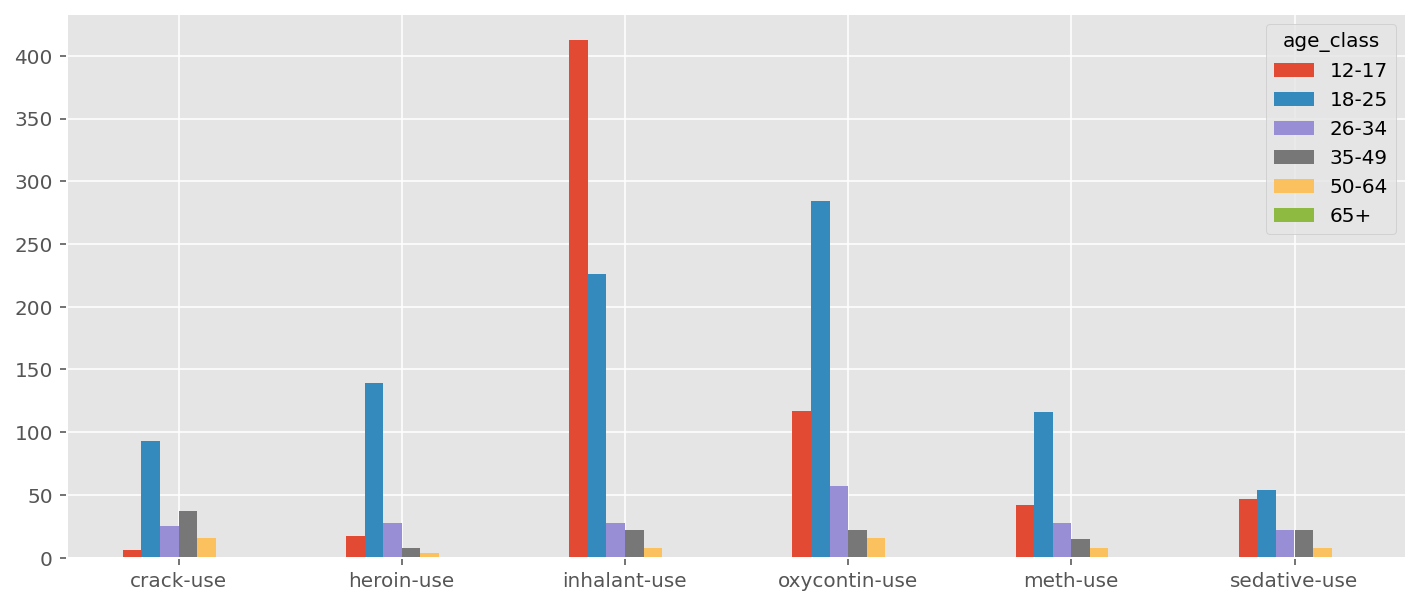

In [93]:
group3 = ['crack-use','heroin-use','inhalant-use', 'oxycontin-use', 'meth-use','sedative-use']
df_groupby[group3].T.plot(kind='bar', figsize=(12,5), rot=0)

In [94]:
# sns.clustermap(drug_df.filter(regex='use').corr())

In [95]:
# some of the notibable correlated drugs
set1 = ['marijuana-use', 'hallucinogen-use', 'pain-releiver-use', 'oxycontin-use','tranquilizer-use', 'stimulant-use']
sns.pairplot(drug_df.filter(regex='use')[set1], corner=True, aspect=1, height=1.5)

In [96]:
df_check = df_groupby[['n']].join(pd.DataFrame(df_groupby.filter(regex='use').sum(axis=1),columns=['sum_of_drug_users']))
df_check

n  sum_of_drug_users
age_class                          
12-17      17399           9245.456
18-25      18615          25858.796
26-34       5492           6523.508
35-49       7391           7087.969
50-64       3923           3193.322
65+         2448           1258.272

In [97]:
df_groupby1 = df_groupby.filter(regex='use').apply(lambda x: (x / df_groupby['n'])*100).round(2)
df_groupby1 = df_groupby[['n']].join(df_groupby1)
df_groupby1

n  alcohol-use  marijuana-use  cocaine-use  crack-use  \
age_class                                                              
12-17      17399        25.50          13.42         0.66       0.03   
18-25      18615        76.31          30.10         4.24       0.50   
26-34       5492        79.03          18.51         2.63       0.45   
35-49       7391        75.00          10.40         1.50       0.50   
50-64       3923        67.20           7.30         0.90       0.40   
65+         2448        49.30           1.20         0.00       0.00   

           heroin-use  hallucinogen-use  inhalant-use  pain-releiver-use  \
age_class                                                                  
12-17            0.10              2.18          2.37               4.84   
18-25            0.75              6.08          1.22               9.45   
26-34            0.50              2.47          0.50               7.05   
35-49            0.10              0.60          0.30               4.20   
50-64            0.10              0.30          0.20               2.50   
65+              0.00              0.10          0.00               0.60   

           oxycontin-use  tranquilizer-use  stimulant-use  meth-use  \
age_class                                                             
12-17               0.67              1.60           1.27      0.24   
18-25               1.53              4.48           3.35      0.62   
26-34               1.04              3.89           1.83      0.50   
35-49               0.30              1.90           0.60      0.20   
50-64               0.40              1.40           0.30      0.20   
65+                 0.00              0.20           0.00      0.00   

           sedative-use  
age_class                
12-17              0.27  
18-25              0.29  
26-34              0.40  
35-49              0.30  
50-64              0.20  
65+                0.00

In [98]:
df_groupby1.filter(regex='use').T.plot(kind='bar', figsize=(12,6))

<AxesSubplot:>

<AxesSubplot:>

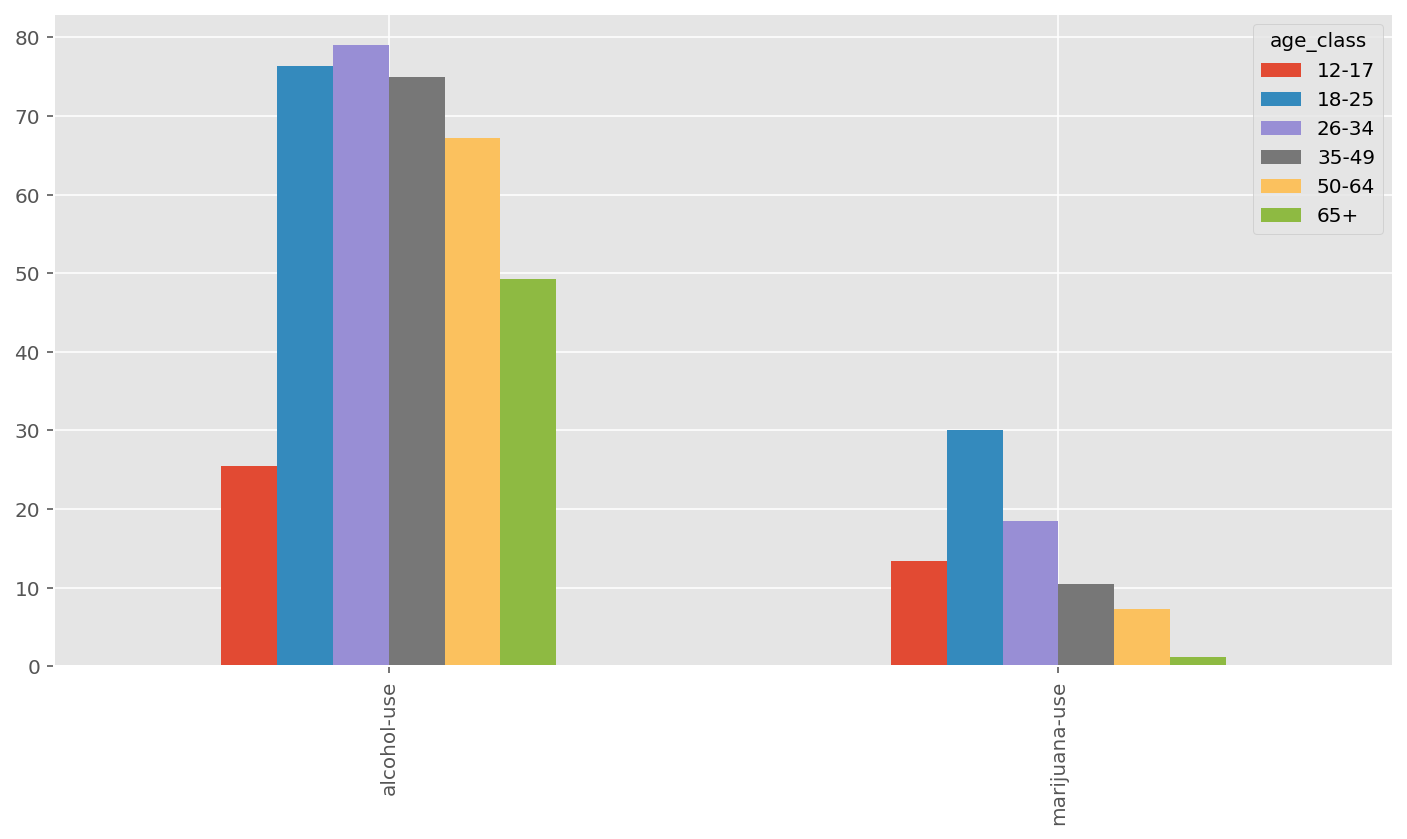

In [99]:
group1 = ['alcohol-use','marijuana-use']
df_groupby1.filter(regex='use')[group1].T.plot(kind='bar', figsize=(12,6))

In [100]:
group2 = ['cocaine-use','hallucinogen-use','pain-releiver-use', 'stimulant-use', 'tranquilizer-use']
df_groupby1.filter(regex='use')[group2].T.plot(kind='bar', figsize=(12,6))

<AxesSubplot:>

<AxesSubplot:>

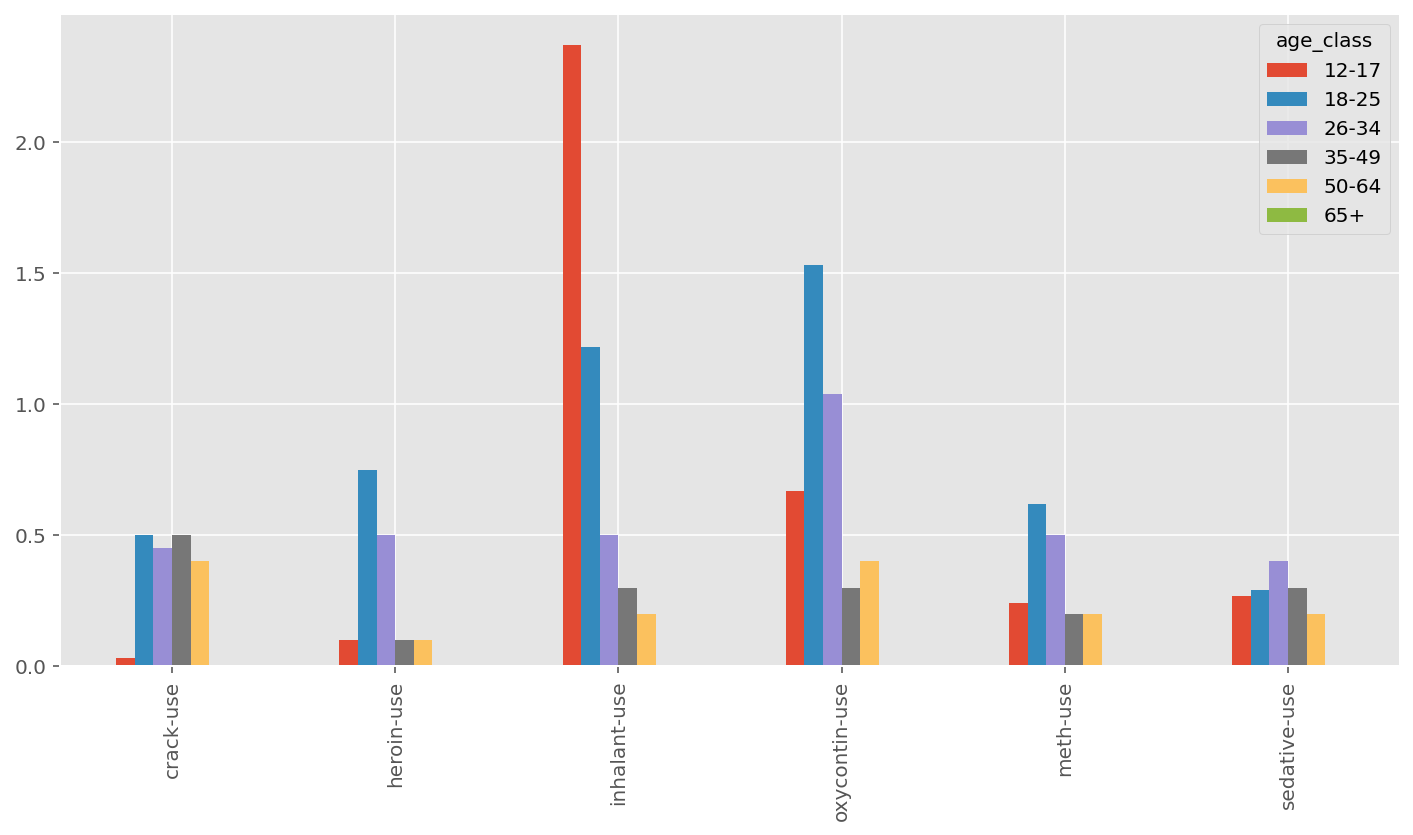

In [101]:
group3 = ['crack-use','heroin-use','inhalant-use', 'oxycontin-use', 'meth-use','sedative-use']
df_groupby1.filter(regex='use')[group3].T.plot(kind='bar', figsize=(12,6))

In [102]:
# Sort columns by mean of drug use
drug_df_sorted=drug_df.reindex(drug_df.mean().sort_values(ascending=False).index, axis=1)
drug_df_sorted

n  heroin-frequency  alcohol-use  marijuana-frequency  \
age                                                               
12     2798              35.5          3.9                  4.0   
13     2757               0.0          8.5                 15.0   
14     2792               2.0         18.1                 24.0   
15     2956               1.0         29.2                 25.0   
16     3058              66.5         40.1                 30.0   
17     3038              64.0         49.3                 36.0   
18     2469              46.0         58.7                 52.0   
19     2223             180.0         64.6                 60.0   
20     2271              45.0         69.7                 60.0   
21     2354              30.0         83.2                 52.0   
22-23  4707              57.5         84.2                 52.0   
24-25  4591              88.0         83.1                 60.0   
26-29  2628              50.0         80.7                 52.0   
30-34  2864              66.0         77.5                 72.0   
35-49  7391             280.0         75.0                 48.0   
50-64  3923              41.0         67.2                 52.0   
65+    2448             120.0         49.3                 36.0   

       alcohol-frequency  meth-frequency  stimulant-frequency  \
age                                                             
12                   3.0             0.0                  2.0   
13                   6.0             5.0                  4.0   
14                   5.0            24.0                 12.0   
15                   6.0            10.5                  6.0   
16                  10.0            36.0                  9.5   
17                  13.0            48.0                  9.0   
18                  24.0            12.0                  8.0   
19                  36.0           105.0                  6.0   
20                  48.0            12.0                 12.0   
21                  52.0             2.0                 10.0   
22-23               52.0            46.0                 10.0   
24-25               52.0            21.0                 10.0   
26-29               52.0            30.0                  7.0   
30-34               52.0            54.0                 12.0   
35-49               52.0           104.0                 24.0   
50-64               52.0            30.0                 24.0   
65+                 52.0             0.0                364.0   

       sedative-frequency  marijuana-use  pain-releiver-frequency  ...  \
age                                                                ...   
12                   13.0            1.1                     36.0  ...   
13                   19.0            3.4                     14.0  ...   
14                   16.5            8.7                     12.0  ...   
15                   30.0           14.5                     10.0  ...   
16                    3.0           22.5                      7.0  ...   
17                    6.5           28.0                      9.0  ...   
18                   10.0           33.7                     12.0  ...   
19                    6.0           33.4                     12.0  ...   
20                    4.0           34.0                     10.0  ...   
21                    9.0           33.0                     15.0  ...   
22-23                52.0           28.4                     15.0  ...   
24-25                17.5           24.9                     15.0  ...   
26-29                 4.0           20.8                     13.0  ...   
30-34                10.0           16.4                     22.0  ...   
35-49                10.0           10.4                     12.0  ...   
50-64               104.0            7.3                     12.0  ...   
65+                  15.0            1.2                     24.0  ...   

       hallucinogen-use  tranquilizer-use  cocaine-use  stimulant-use  \
age                 

In [103]:
# Full Spectrum of Drugs Users sorted by most popular grouped by age

group1 = ['alcohol-use','marijuana-use']
drug_df_sorted.filter(regex='use')[group1].T.plot.bar(figsize=(15,8))
# ax.legend(title='Age Group',labels=drugs['age'])
# ax.set_title('Grouped Number of Drug Users by Age')

<AxesSubplot:>

In [104]:
group1 = ['alcohol-use','marijuana-use']
drug_df_sorted.filter(regex='use').drop(columns=group1).T.plot.bar(rot=45,figsize=(15,8))
plt.title('Grouped Number of Drug Users by Age')

Text(0.5, 1.0, 'Grouped Number of Drug Users by Age')

Text(0.5, 1.0, 'Grouped Number of Drug Users by Age')

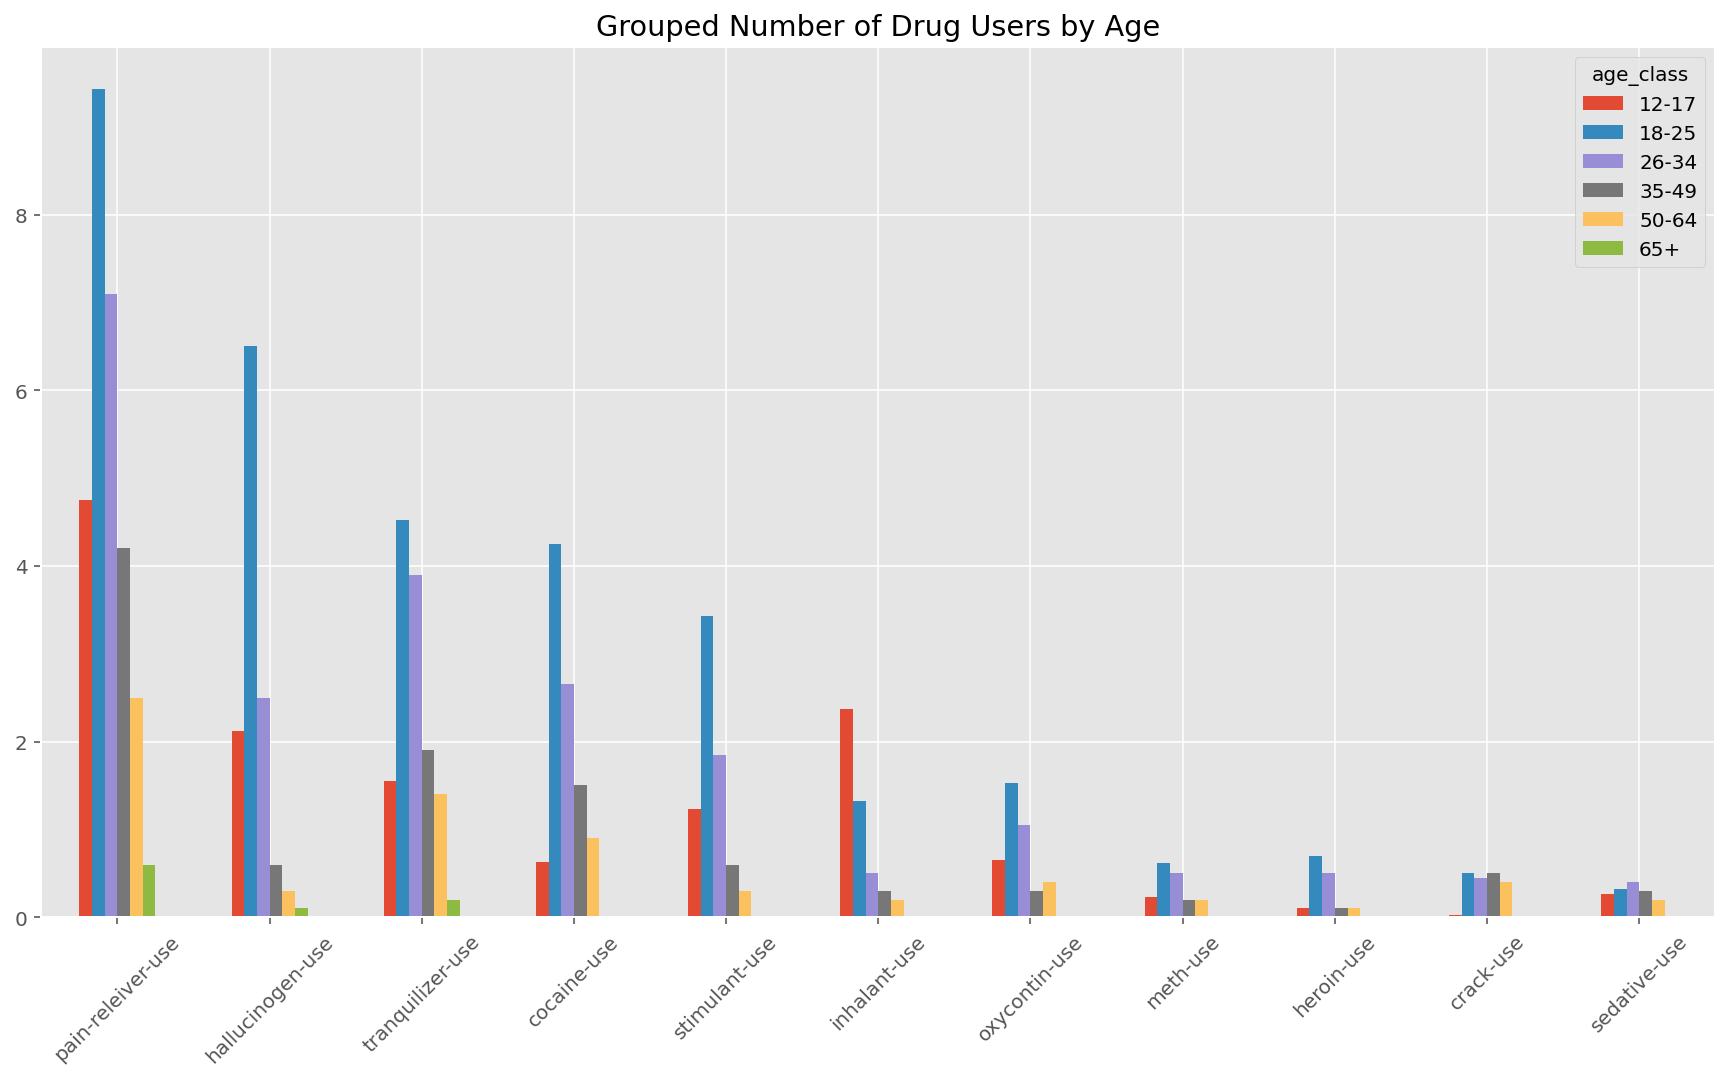

In [105]:
df1 = drug_df_groupby.groupby('age_class').mean().round(2)

df1 = df1.reindex(drug_df.mean().sort_values(ascending=False).index, axis=1)
group1 = ['alcohol-use','marijuana-use']
df1.filter(regex='use').drop(columns=group1).T.plot.bar(rot=45,figsize=(15,8))
plt.title('Grouped Number of Drug Users by Age')

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

## <u>Hypothesis
    H0 : The mean of alcohol-use is the same as the mean of marijuana-use.
    H1 : The mean of alcohol-use is not the same as the mean of marijuana-use.

In [106]:
from scipy.stats import t

## the confidence interval is set to 95% so alpha = 0.05.
alpha = 0.05

# Confidence interval (95%) for the mean of alcohol-use, with standard error of the mean sem()
ci_alcohol_use = t.interval(0.95,
                               len(drug_df['alcohol-use'])-1,
                               loc=drug_df['alcohol-use'].mean(),
                               scale=drug_df['alcohol-use'].sem())

#print(f"Confidence interval (95%) for the mean of alcohol-use : {cf_alcohol_use}")
print(f"We are 95% confident that the true mean value for alcohol-use is between {round(ci_alcohol_use[0],2)} and {round(ci_alcohol_use[1],2)}.")
ci_marijuana_use = t.interval(0.95,
                               len(drug_df['marijuana-use'])-1,
                               loc=drug_df['marijuana-use'].mean(),
                               scale=drug_df['marijuana-use'].sem())

print(f"We are 95% confident that the true mean value for marijuana-use is between {round(ci_marijuana_use[0],2)} and {round(ci_marijuana_use[1],2)}.")

We are 95% confident that the true mean value for alcohol-use is between 41.61 and 69.25.
We are 95% confident that the true mean value for marijuana-use is between 12.77 and 25.07.


In [107]:
import scipy.stats as stats

ttest_pvalue = stats.ttest_ind(drug_df['alcohol-use'], drug_df['marijuana-use'])
print(f"t-test is: {ttest_pvalue[0]}")
print(f"p-value is: {ttest_pvalue[1]}")
print('\n')
if ttest_pvalue[1] < alpha:
    print("""We reject our null hypothesis and conclude the mean alcohol-use is different from the mean of marijuana-use.""")
elif ttest_pvalue[1] > alpha:
    print("We fail to reject our null hypothesis and cannot conclude that the mean alcohol-use is different from the mean of marijuana-use.")
else:
    print("Our test is inconclusive.")

t-test is: 5.116246810580653
p-value is: 1.4171567091021532e-05


We reject our null hypothesis and conclude the mean alcohol-use is different from the mean of marijuana-use.


**The plot of mean alcohol-use and marijuan-use with 95% confidence interval concludes that these are not related each other. The p-value indicates there is a 0.0039% chance that the null hypothesis is true. This is less than the 5% significance level, hence we reject the null hypothesis that the mean alcohol-use is different from the mean of marijuana-use.**

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [108]:
rate_df = sat_df[['Rate']]
rate_df.head()

Rate
0    82
1    81
2    79
3    77
4    72

In [109]:
rate_df.Rate.values

array([82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56,
       55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12,
       12, 11, 11,  9,  9,  9,  8,  8,  8,  7,  6,  6,  5,  5,  4,  4,  4],
      dtype=int64)

In [110]:
rate_df.plot(kind='box', vert=False)

<AxesSubplot:>

In [111]:
import scipy.stats as stats

In [112]:
rate_df[(np.abs(stats.zscore(rate_df)) > 3)]  #.all(axis=1)

Empty DataFrame
Columns: [Rate]
Index: []

In [113]:
# There does not appear to be any outliers. This is determined by checking whether any of the z-scores
# are greater than 3 standard deviations from the mean of zero. 

In [114]:
math_df = sat_df[['Math']]
math_df[(np.abs(stats.zscore(math_df)) > 3)]  #.all(axis=1)

Empty DataFrame
Columns: [Math]
Index: []

In [115]:
sat_df[np.abs(stats.zscore(sat_df[['Rate', 'Verbal', 'Math']]))>3]

Empty DataFrame
Columns: [State, Rate, Verbal, Math, State_to_Region, Verbal - Math]
Index: []

In [116]:
#there does not appear to be any outliers in the SAT data set.

In [117]:
sat_df['Math'].values

array([510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499,
       489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515,
       542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580,
       554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551],
      dtype=int64)

In [118]:
# this falls just within the range and so it is not considered an outlier just yet
sat_df[sat_df['Math']==439]

State  Rate  Verbal  Math State_to_Region  Verbal - Math
27    OH    26     534   439         Midwest             95

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [119]:
# null hypothesis is that two sets of data are uncorrelated:
stats.spearmanr(sat_df['Verbal'], sat_df['Math'])

# Thus we would reject the null and conclude the two columns are correlated

SpearmanrResult(correlation=0.9094125143903472, pvalue=2.6565430361616923e-20)

In [120]:
stats.pearsonr(sat_df['Verbal'], sat_df['Math'])

(0.8999093181811046, 2.735579353543538e-19)

In [121]:
sat_df[['Verbal', 'Math']].corr()

Verbal      Math
Verbal  1.000000  0.899909
Math    0.899909  1.000000

The Pearson correlation evaluates the linear relationship between two continuous variables. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data. Spearman correlation is often used to evaluate relationships involving ordinal variables.

The difference between the Pearson correlation and the Spearman correlation is that the Pearson is most appropriate for measurements taken from an interval scale, while the Spearman is more appropriate for measurements taken from ordinal scales.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [122]:
from scipy.stats import percentileofscore

In [123]:
sat_df.drop(columns=['State_to_Region', 'Verbal - Math'], inplace=True)
sat_df = sat_df.sort_values(by='Rate')
sat_df

State  Rate  Verbal  Math
50    MS     4     566   551
49    ND     4     592   599
48    SD     4     577   582
47    IA     5     593   603
46    UT     5     575   570
45    AR     6     562   550
44    WI     6     584   596
43    LA     7     564   562
42    MO     8     577   577
41    OK     8     567   561
40    NE     8     562   568
37    MN     9     580   589
39    AL     9     559   554
38    KS     9     577   580
35    WY    11     547   545
36    MI    11     561   572
34    KY    12     550   550
33    IL    12     576   589
32    NM    13     551   542
31    TN    13     562   553
30    ID    17     543   542
29    WV    18     527   512
28    MT    23     539   539
27    OH    26     534   439
26    CO    31     539   542
25    NV    33     509   515
24    AZ    34     523   525
23    CA    51     498   517
22    AK    51     514   510
21    HI    52     485   515
20    TX    53     493   499
19    WA    53     527   527
18    FL    54     498   499
17    OR    55     526   526
16    DC    56     482   474
15    SC    57     486   488
14    IN    60     499   501
13    GA    63     491   489
11    MD    65     508   510
12    NC    65     493   499
10    DE    67     501   499
9     VA    68     510   501
8     ME    69     506   500
7     VT    69     511   506
6     PA    71     500   499
5     RI    71     501   499
4     NH    72     520   516
3     NY    77     495   505
2     MA    79     511   515
1     NJ    81     499   513
0     CT    82     509   510

In [124]:
sat_df = sat_df.sort_values(by='Rate')
sat_df

State  Rate  Verbal  Math
50    MS     4     566   551
49    ND     4     592   599
48    SD     4     577   582
47    IA     5     593   603
46    UT     5     575   570
45    AR     6     562   550
44    WI     6     584   596
43    LA     7     564   562
42    MO     8     577   577
41    OK     8     567   561
40    NE     8     562   568
38    KS     9     577   580
39    AL     9     559   554
37    MN     9     580   589
35    WY    11     547   545
36    MI    11     561   572
34    KY    12     550   550
33    IL    12     576   589
32    NM    13     551   542
31    TN    13     562   553
30    ID    17     543   542
29    WV    18     527   512
28    MT    23     539   539
27    OH    26     534   439
26    CO    31     539   542
25    NV    33     509   515
24    AZ    34     523   525
23    CA    51     498   517
22    AK    51     514   510
21    HI    52     485   515
20    TX    53     493   499
19    WA    53     527   527
18    FL    54     498   499
17    OR    55     526   526
16    DC    56     482   474
15    SC    57     486   488
14    IN    60     499   501
13    GA    63     491   489
12    NC    65     493   499
11    MD    65     508   510
10    DE    67     501   499
9     VA    68     510   501
8     ME    69     506   500
7     VT    69     511   506
6     PA    71     500   499
5     RI    71     501   499
4     NH    72     520   516
3     NY    77     495   505
2     MA    79     511   515
1     NJ    81     499   513
0     CT    82     509   510

In [125]:
sat_df['rate_percentiles'] = sat_df['Rate'].apply(lambda x: percentileofscore(sat_df['Rate'], x))
sat_df

State  Rate  Verbal  Math  rate_percentiles
50    MS     4     566   551          3.921569
49    ND     4     592   599          3.921569
48    SD     4     577   582          3.921569
47    IA     5     593   603          8.823529
46    UT     5     575   570          8.823529
45    AR     6     562   550         12.745098
44    WI     6     584   596         12.745098
43    LA     7     564   562         15.686275
42    MO     8     577   577         19.607843
41    OK     8     567   561         19.607843
40    NE     8     562   568         19.607843
38    KS     9     577   580         25.490196
39    AL     9     559   554         25.490196
37    MN     9     580   589         25.490196
35    WY    11     547   545         30.392157
36    MI    11     561   572         30.392157
34    KY    12     550   550         34.313725
33    IL    12     576   589         34.313725
32    NM    13     551   542         38.235294
31    TN    13     562   553         38.235294
30    ID    17     543   542         41.176471
29    WV    18     527   512         43.137255
28    MT    23     539   539         45.098039
27    OH    26     534   439         47.058824
26    CO    31     539   542         49.019608
25    NV    33     509   515         50.980392
24    AZ    34     523   525         52.941176
23    CA    51     498   517         55.882353
22    AK    51     514   510         55.882353
21    HI    52     485   515         58.823529
20    TX    53     493   499         61.764706
19    WA    53     527   527         61.764706
18    FL    54     498   499         64.705882
17    OR    55     526   526         66.666667
16    DC    56     482   474         68.627451
15    SC    57     486   488         70.588235
14    IN    60     499   501         72.549020
13    GA    63     491   489         74.509804
12    NC    65     493   499         77.450980
11    MD    65     508   510         77.450980
10    DE    67     501   499         80.392157
9     VA    68     510   501         82.352941
8     ME    69     506   500         85.294118
7     VT    69     511   506         85.294118
6     PA    71     500   499         89.215686
5     RI    71     501   499         89.215686
4     NH    72     520   516         92.156863
3     NY    77     495   505         94.117647
2     MA    79     511   515         96.078431
1     NJ    81     499   513         98.039216
0     CT    82     509   510        100.000000

In [126]:
#Show the percentile of California in Rate

In [127]:
sat_df[sat_df['State']=='CA']

State  Rate  Verbal  Math  rate_percentiles
23    CA    51     498   517         55.882353

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

**The percentile is a raw score of the ranking of variable. Anytime that a set of data needs to be broken into digestible chunks, percentiles are helpful. They are often used to interpret test scores—such as SAT scores—so that test-takers can compare their performance to that of other students. The IQR can then be calculated as the difference between the 75th and 25th percentiles. We can then calculate the cutoff for outliers as 1.5 times the IQR and subtract this cut-off from the 25th percentile and add it to the 75th percentile to give the actual limits on the data.**

(array([2., 1., 0., 1., 1., 2., 1., 2., 2., 5.]),
 array([ 3.9 , 11.93, 19.96, 27.99, 36.02, 44.05, 52.08, 60.11, 68.14,
        76.17, 84.2 ]),
 <BarContainer object of 10 artists>)

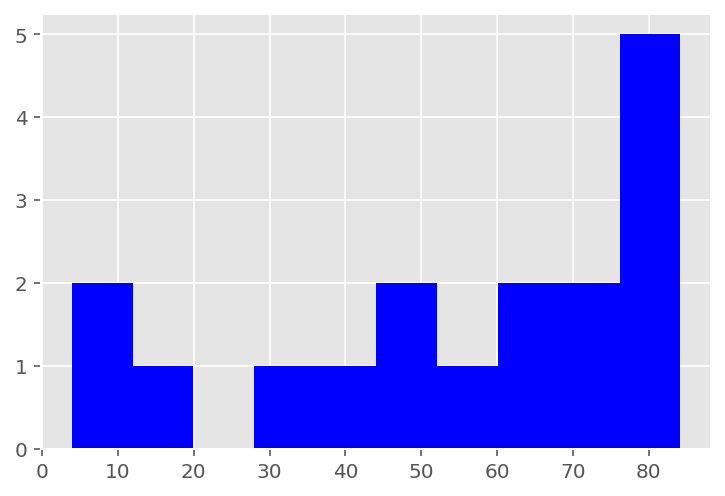

In [128]:
plt.hist(drug_df['alcohol-use'], color = 'b', bins = 10)

(array([2., 2., 1., 2., 2., 1., 2., 1., 2., 2.]),
 array([  5.88235294,  15.29411765,  24.70588235,  34.11764706,
         43.52941176,  52.94117647,  62.35294118,  71.76470588,
         81.17647059,  90.58823529, 100.        ]),
 <BarContainer object of 10 artists>)

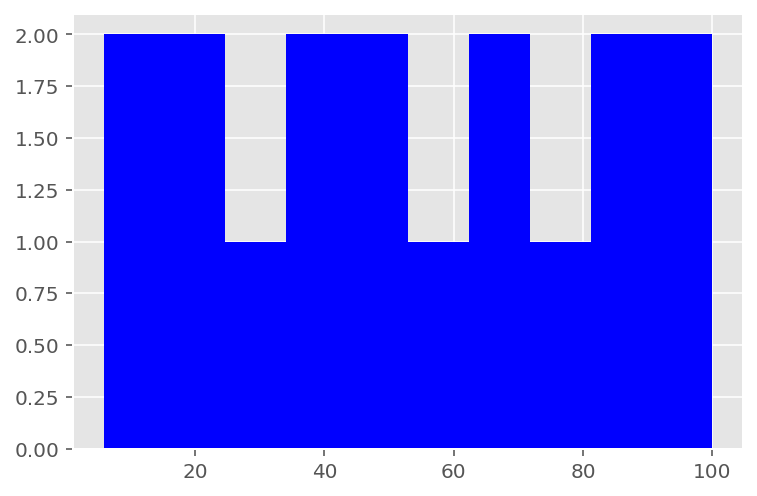

In [129]:
alcohol_percentile = [stats.percentileofscore(drug_df['alcohol-use'], a) for a in drug_df['alcohol-use']]
plt.hist(alcohol_percentile, color = 'b', bins = 10)